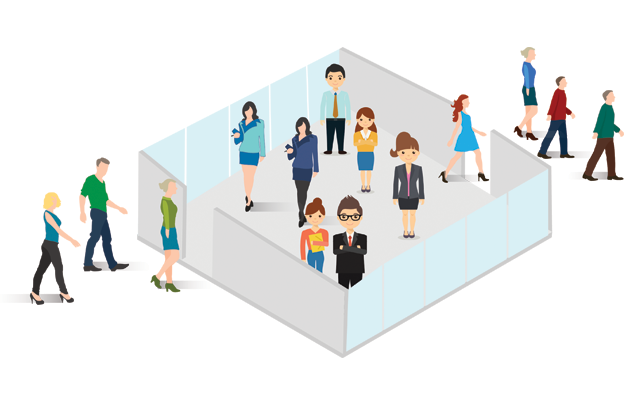

### BUSINESS OVERVIEW
SyriaTel is a telecommunication company in Syria that is facing customer churn.Its trying to identify customers with high risk of leaving and how to retain them.Customer churn can be a major source of revenue loss for a telecom company, as it can be costly to acquire new customers to replace those who leave.Overall, we are looking on how to build a classifier whose main goal is to predict customer churn in order help the telecom company to retain valuable customers, reduce revenue loss, and improve customer satisfaction. This can ultimately lead to increased revenue and profitability for the company.

### BUSINESS PROBLEM
SyriaTel a communication company is looking on how to reduce churn rate in their company.Churn prediction is a technique used by companies to identify customers who are most likely to stop using their products or services.By using the dataset provided we are going to be exploring the features provided in order to create a classifier that can predict the likelihood of a customer churning and also the factors that lead to high customer churning.with creation of an effective model Syriatel will be able to identify their weaknesses and how to improve inorder to be able to maintain their customers and reduce customers leaving.

## objectives
The main objectives of our project are
  
   1.our main objective is to identify the features that lead to high customer churning  and to what extent
  
   2.To create predictive,supervised models that can predict churn 
   
   3.To identify ways in which we can reduce customer churning by comparing with features causing it.e.g they can improve their     customer service calls 
   
   4.What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions

##### DATA UNDERSTANDING

In [68]:
#DATA MANIPULATION
import pandas as pd
import numpy as np

#VISUALISATION

import matplotlib.pyplot as plt
import seaborn as sns

# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [58]:
#loading the data
data=pd.read_csv('customer churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Column description

***state***. 2-letter code of the US state of customer residence

***account_length***. Number of months the customer has been with the current telco provider

***area_code***="area_code_AAA" where AAA = 3 digit area code.

***international_plan***, (yes/no). The customer has international plan.

***voice_mail_plan, (yes/no)***. The customer has voice mail plan.

***number_vmail_messages***, numerical. Number of voice-mail messages.

***total_day_minutes***. Total minutes of day calls.

***total_day_calls***. Total minutes of day calls.

***total_day_charge***. Total charge of day calls.

***total_eve_minutes***. Total minutes of evening calls.

***total_eve_calls***. Total number of evening calls.

**total_eve_charge***. Total charge of evening calls.

***total_night_minutes*** . Total minutes of night calls.

***total_night_calls***. Total number of night calls.

***total_night_charge***. Total charge of night calls.

***total_intl_minutes***. Total minutes of international calls.

***total_intl_calls***. Total number of international calls.

***total_intl_charge***. Total charge of international calls

***number_customer_service_calls***. Number of calls to customer service

***churn, (yes/no)***. Customer churn - target variable.

***customer service call***- number of customer service calls made by clients

In [166]:
cat_vars = []
num_vars = []

for col in data.columns:
    if data[col].dtype == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)
num_vars.pop(-1)
cat_vars.pop(1)     
print('Categorical variables:', cat_vars)
print('Numerical variables:', num_vars)

Categorical variables: ['state', 'international plan', 'voice mail plan']
Numerical variables: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [7]:
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())
    print(self.describe())
    print(self.isna)

In [8]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

In [9]:
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [10]:
def data_cleaning(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"missing values :{missing_values}\nduplicated values:{duplicated_values}")
data_cleaning(data)

missing values :0
duplicated values:0


In [11]:
#dropping the phone number columns
data.drop(['phone number'], axis=1,inplace=True)
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Visualisations

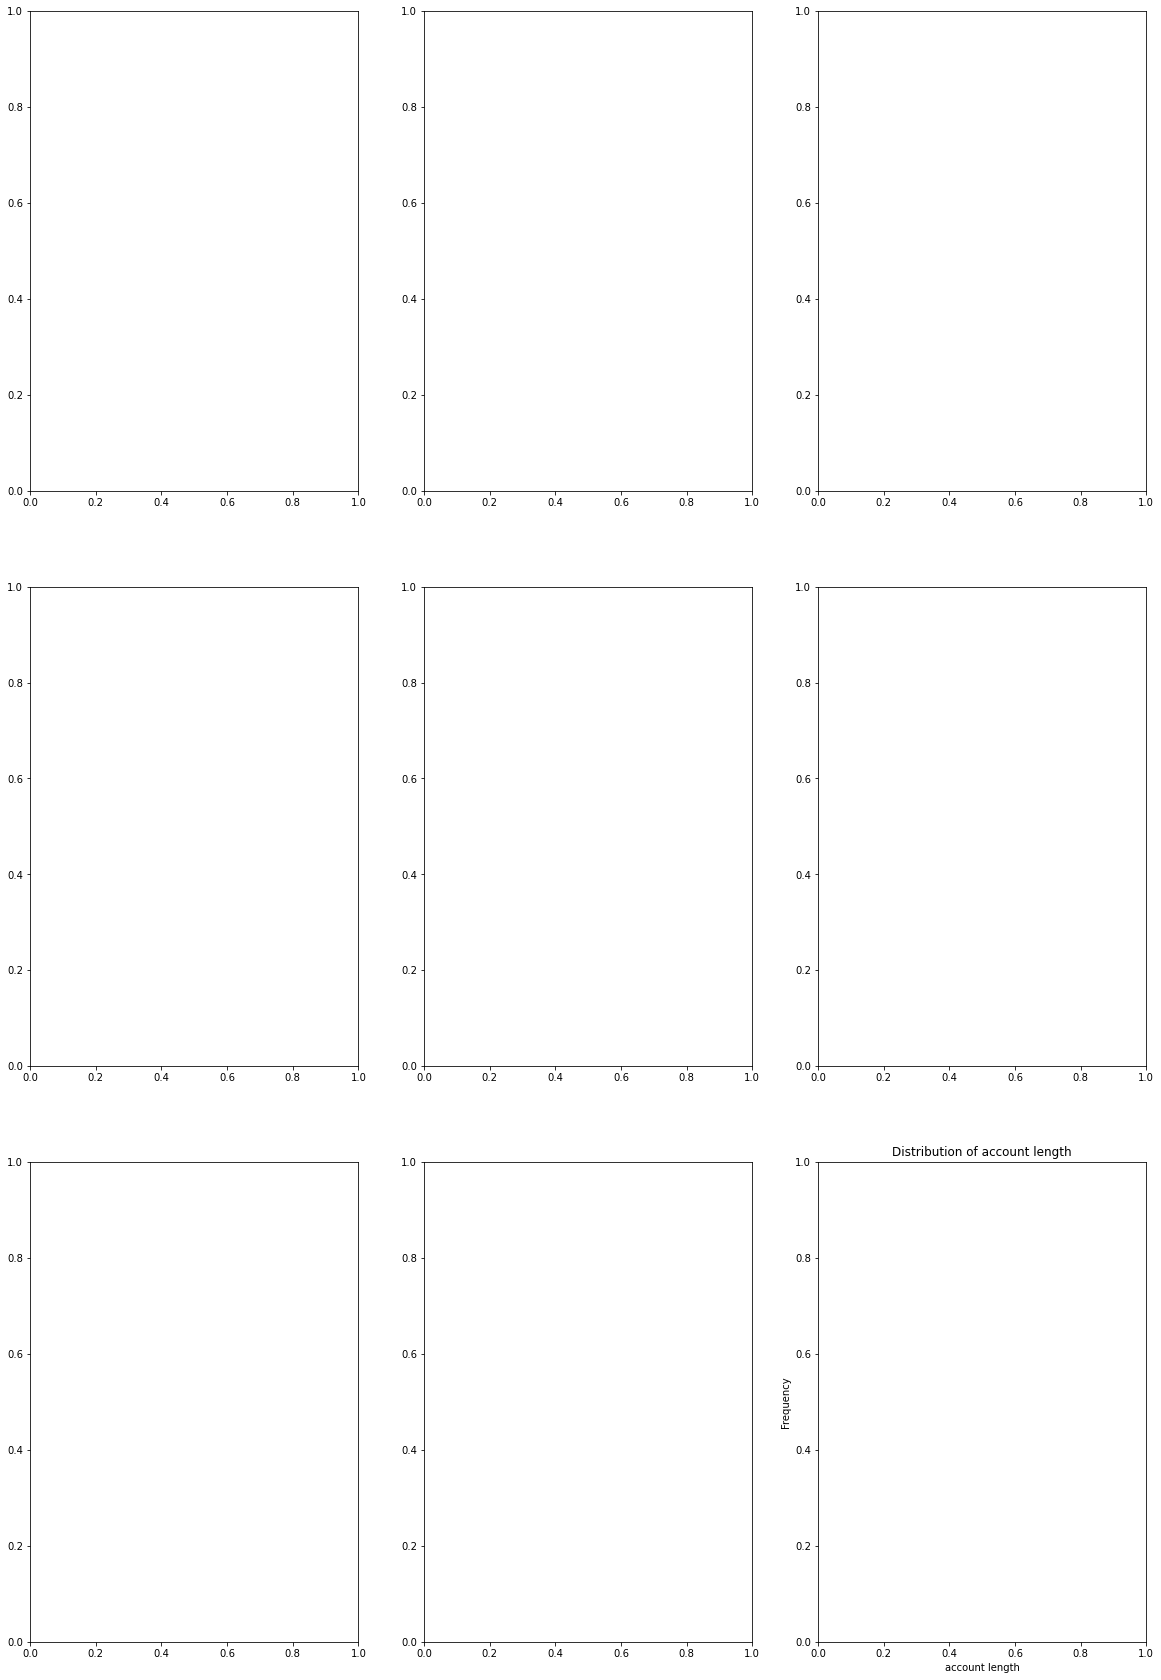

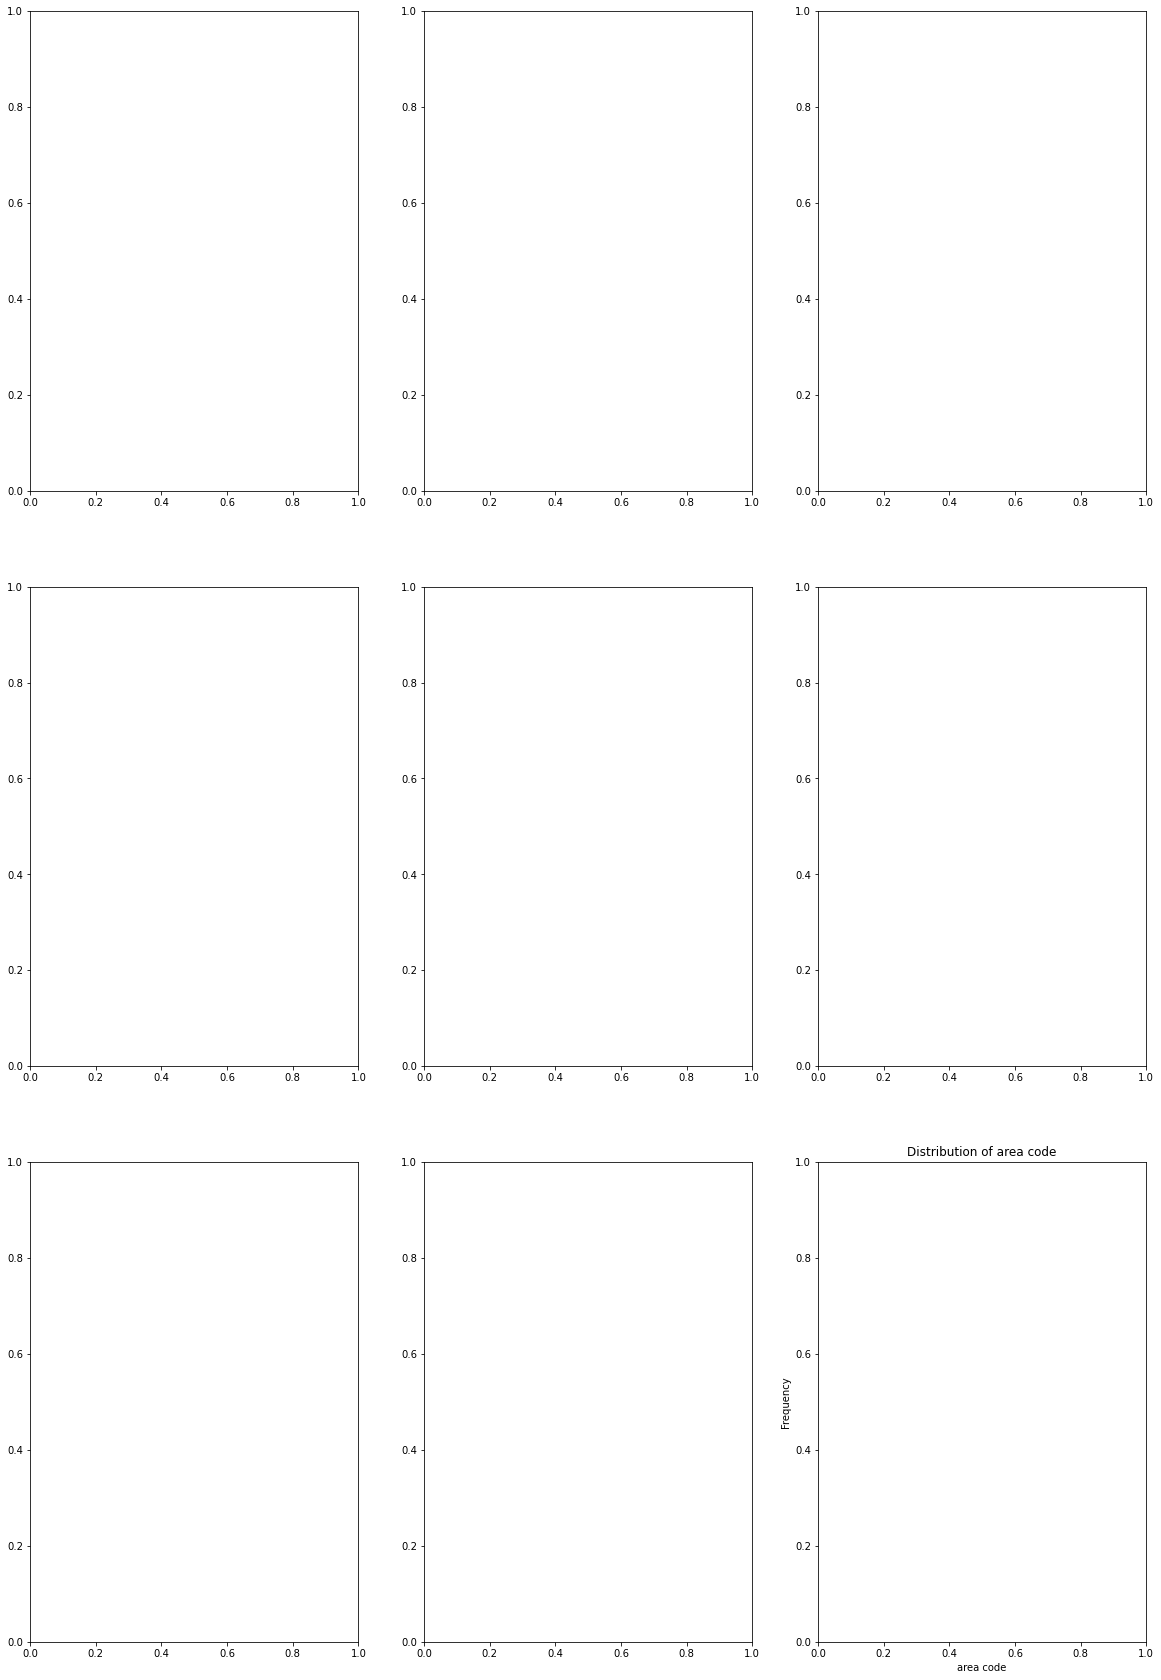

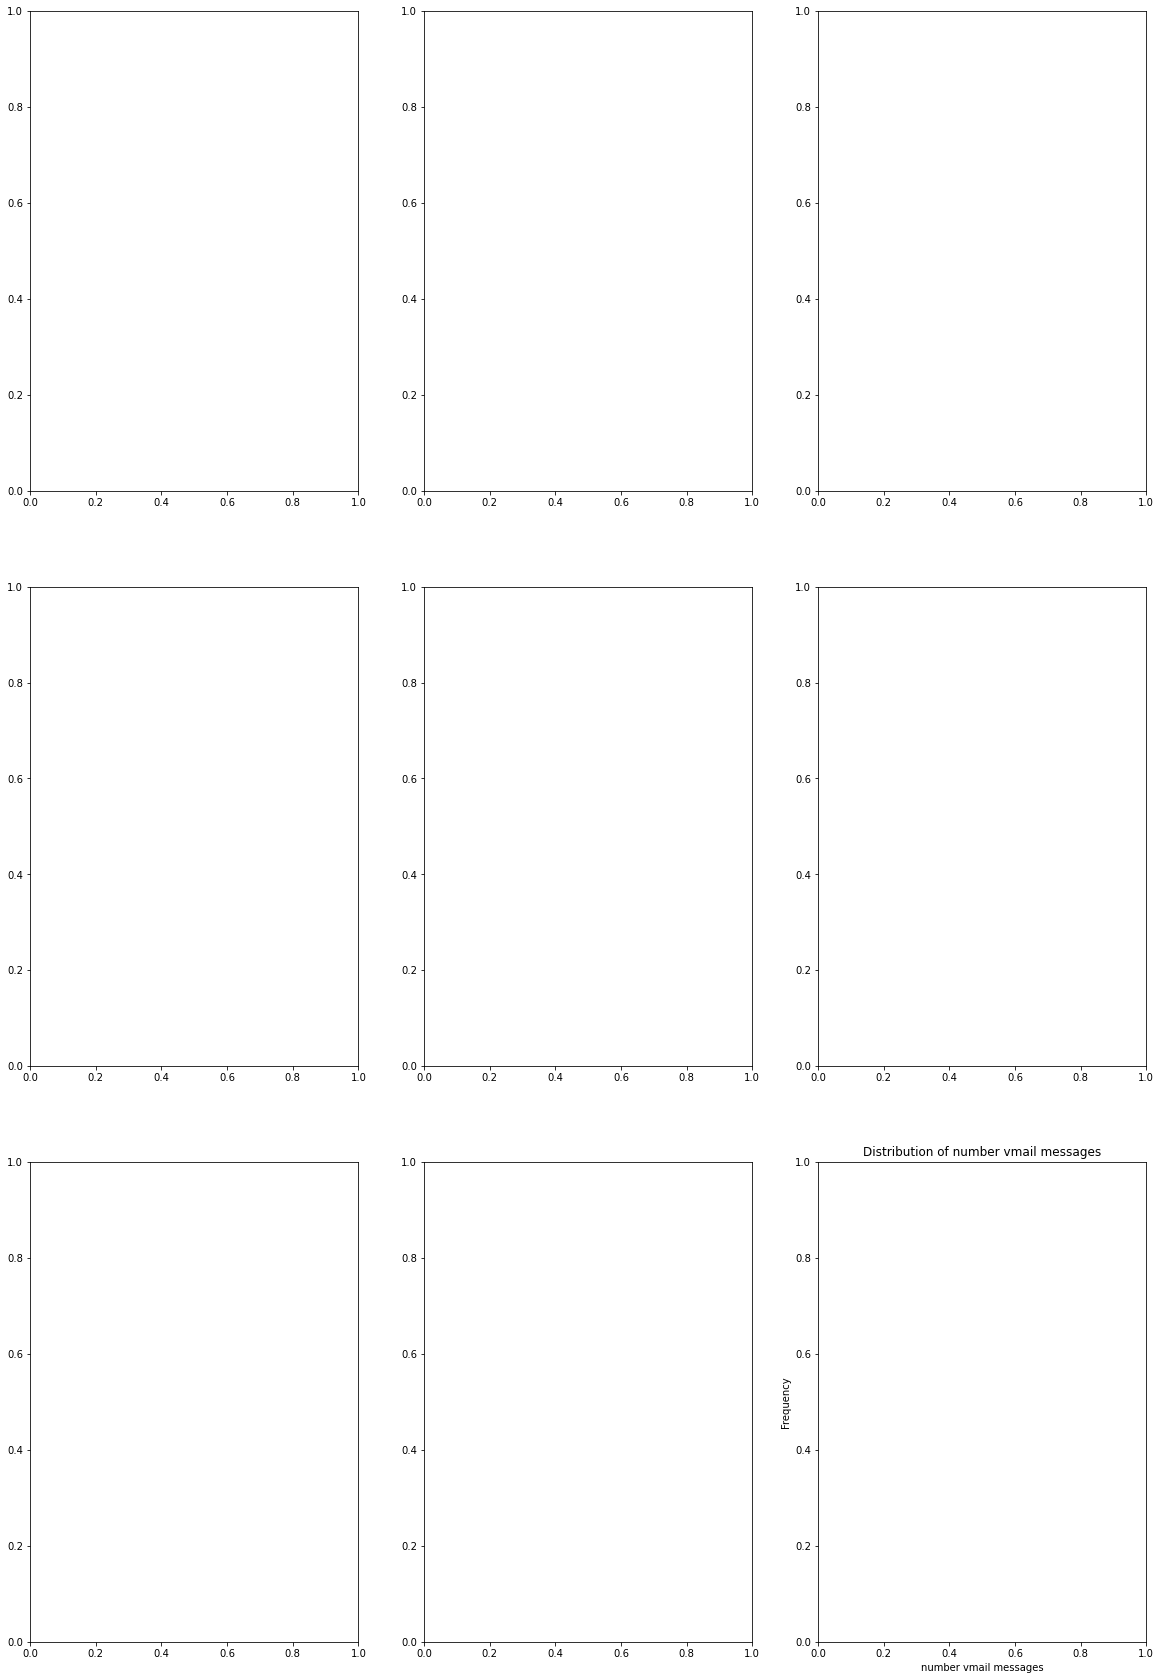

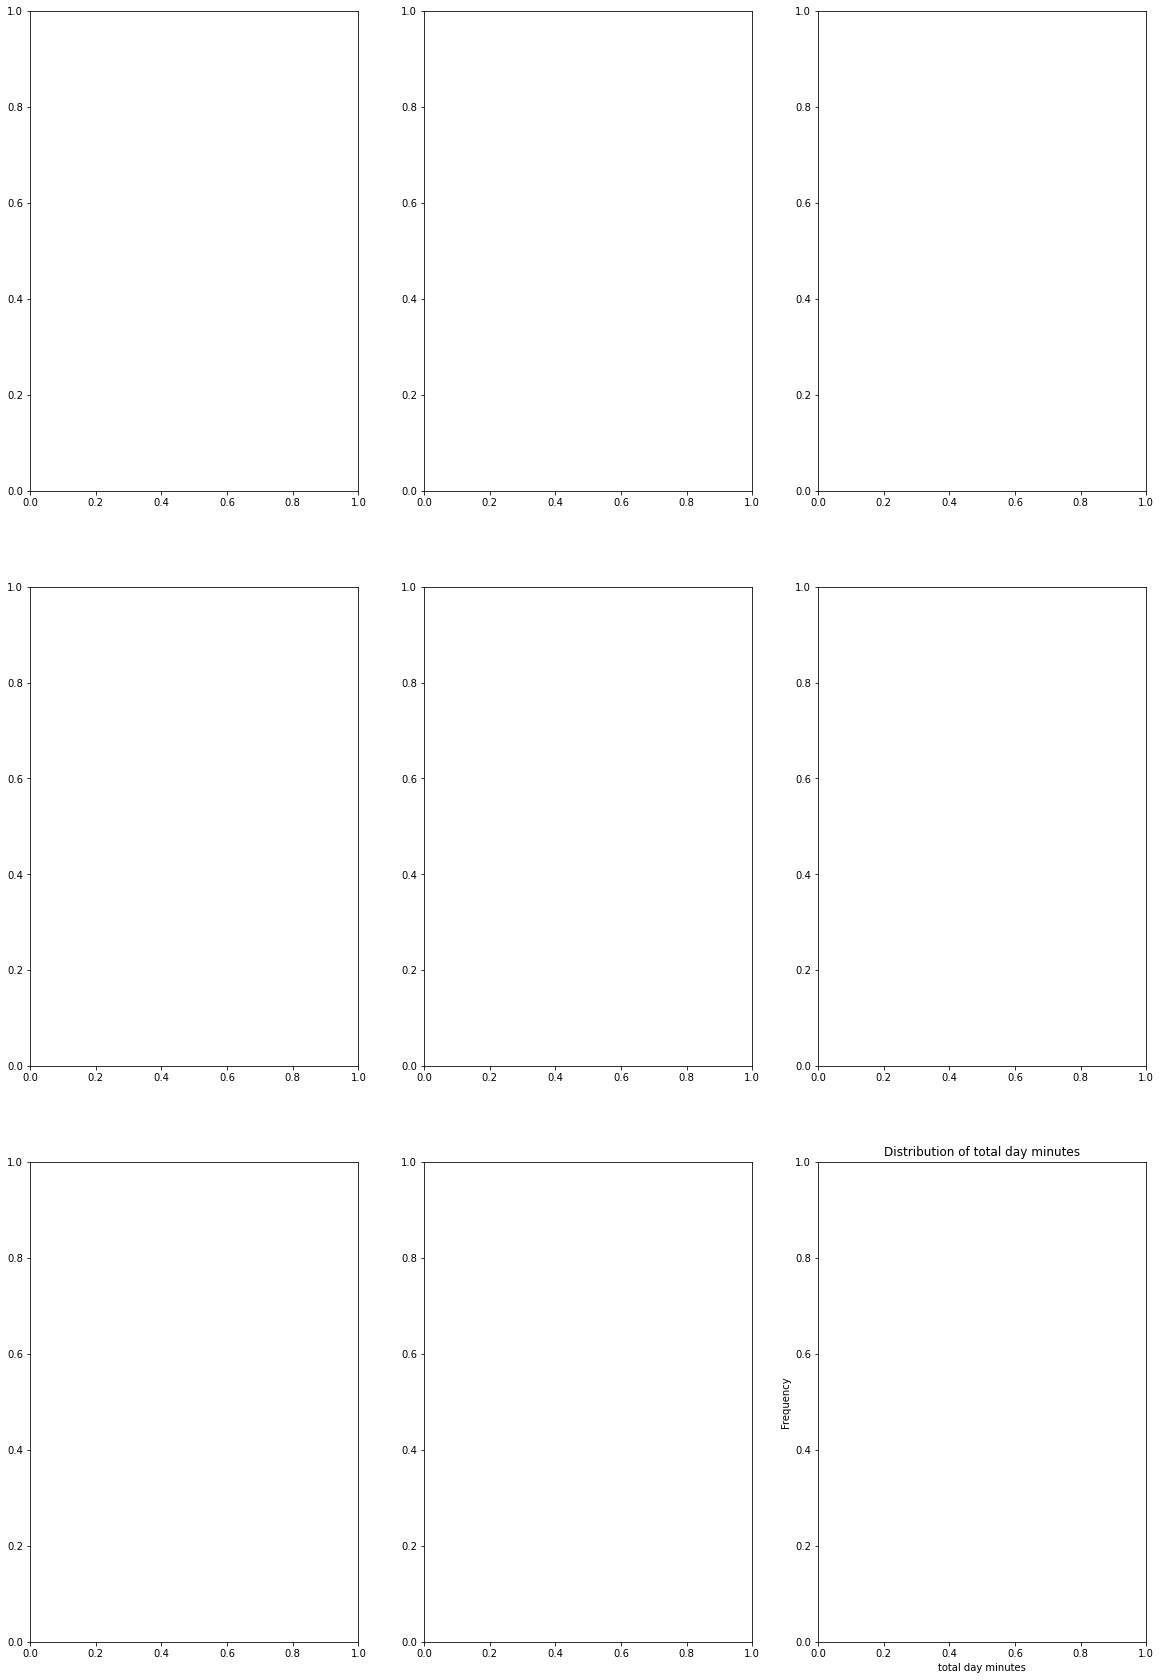

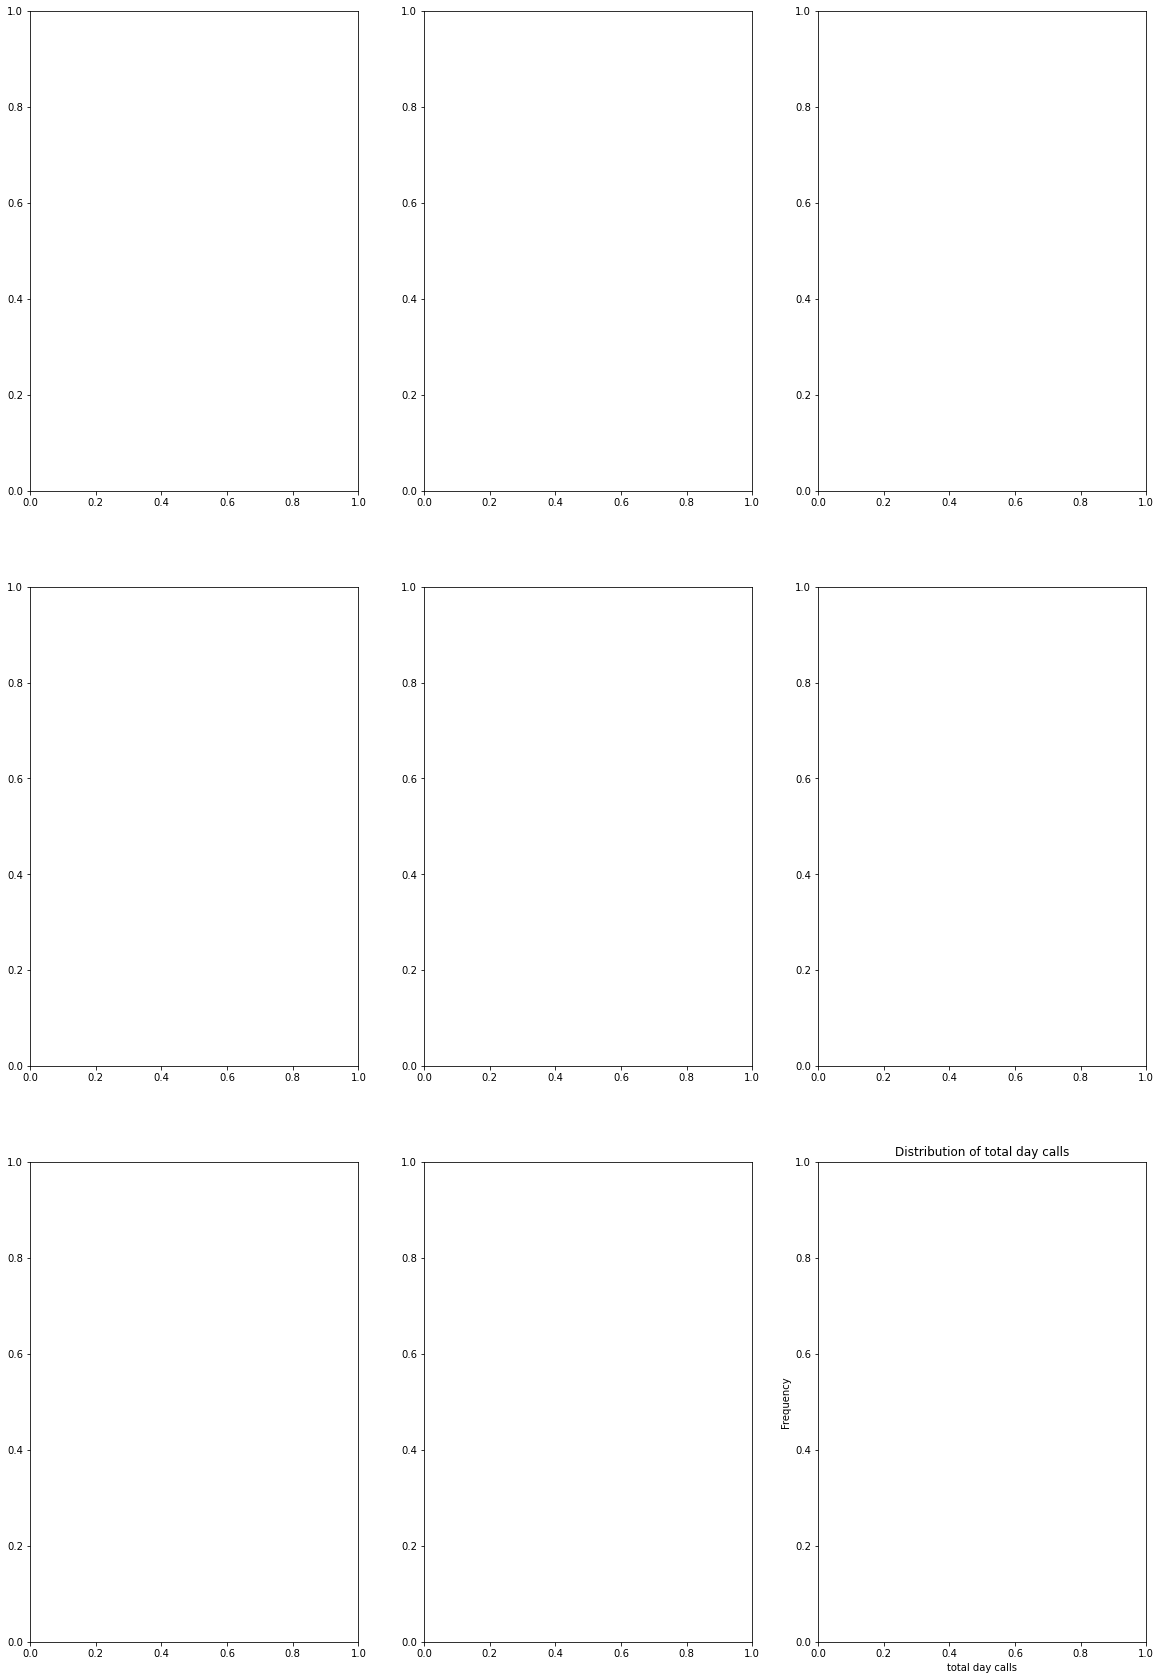

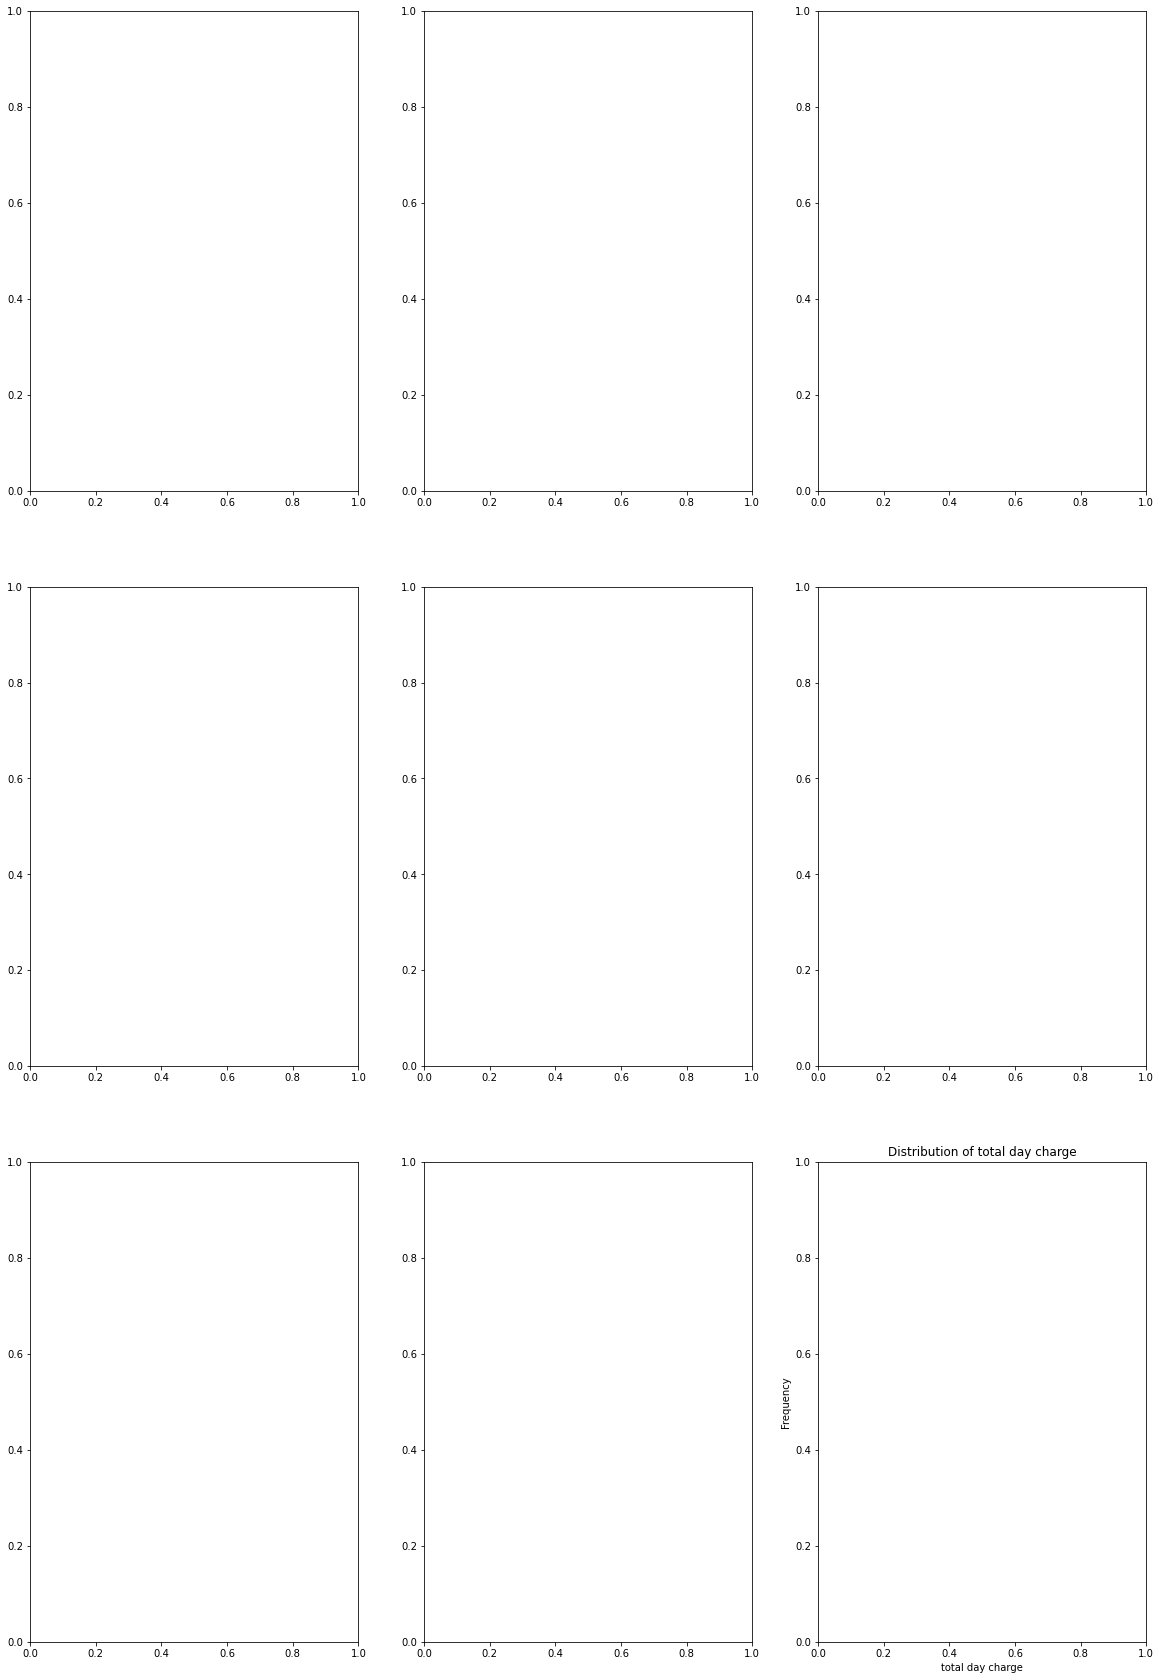

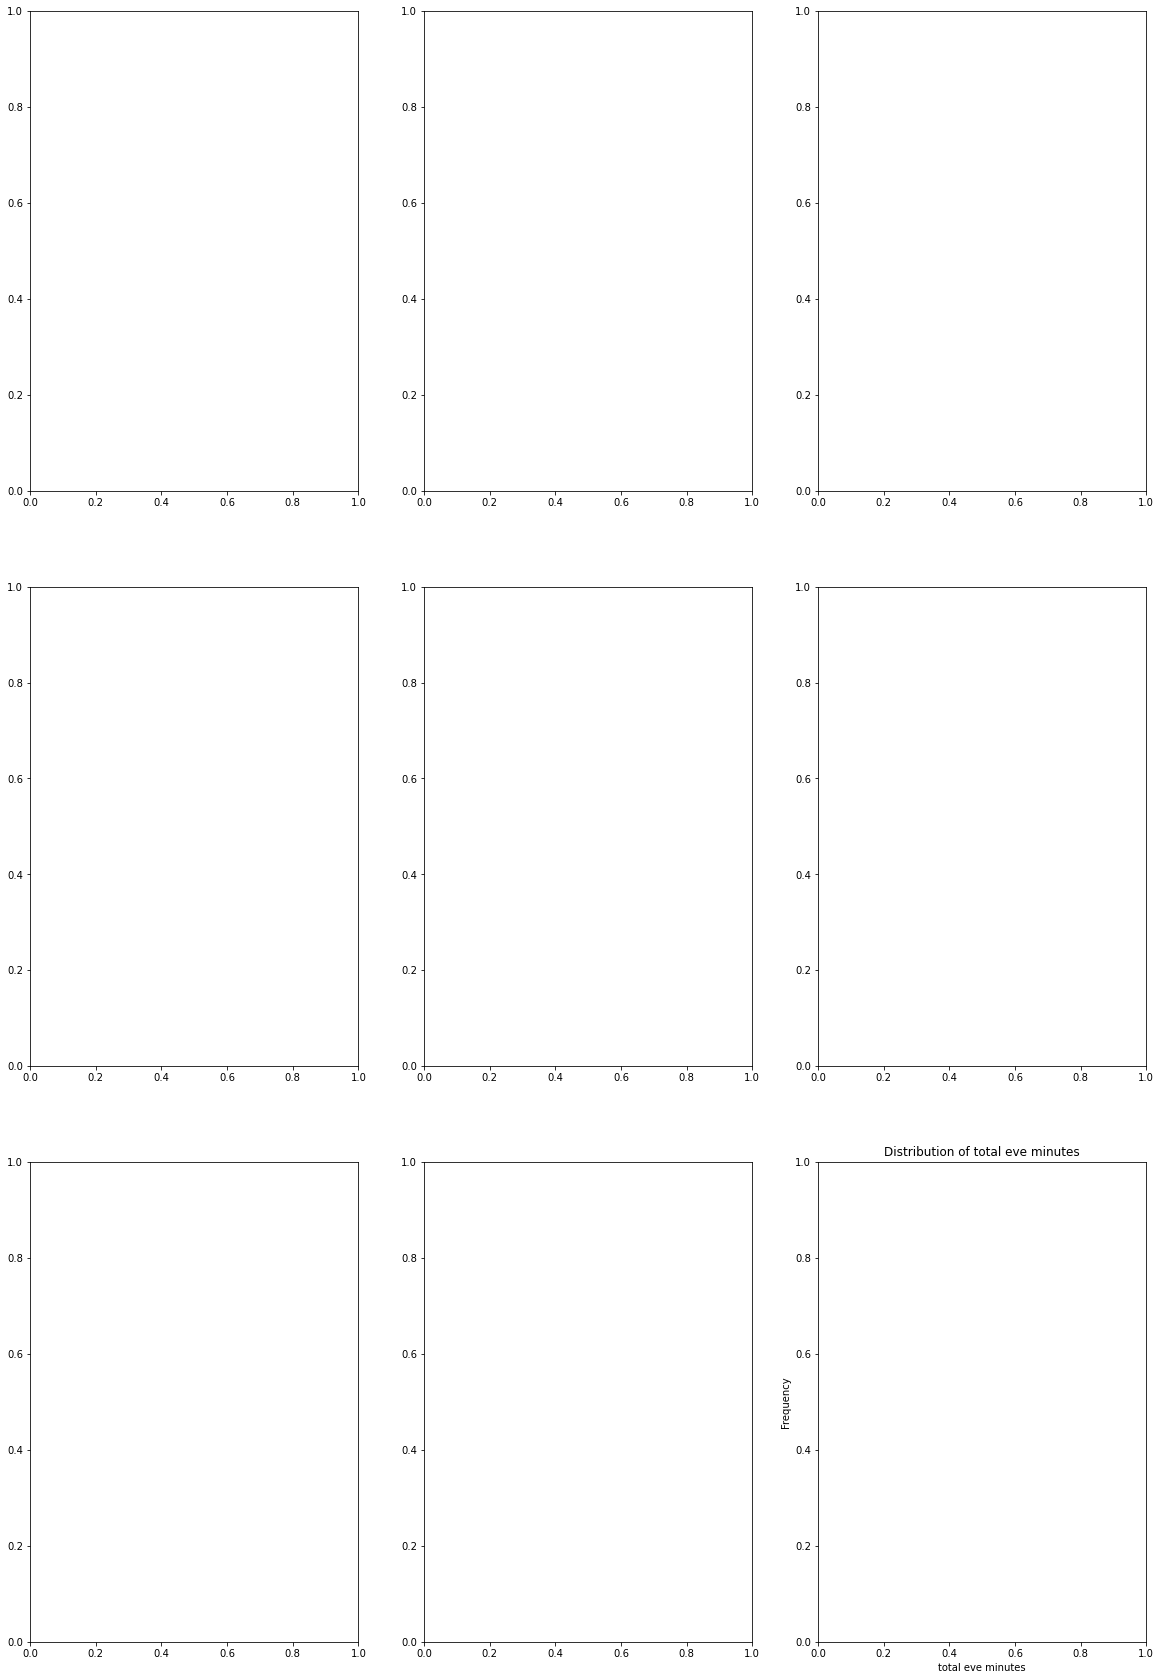

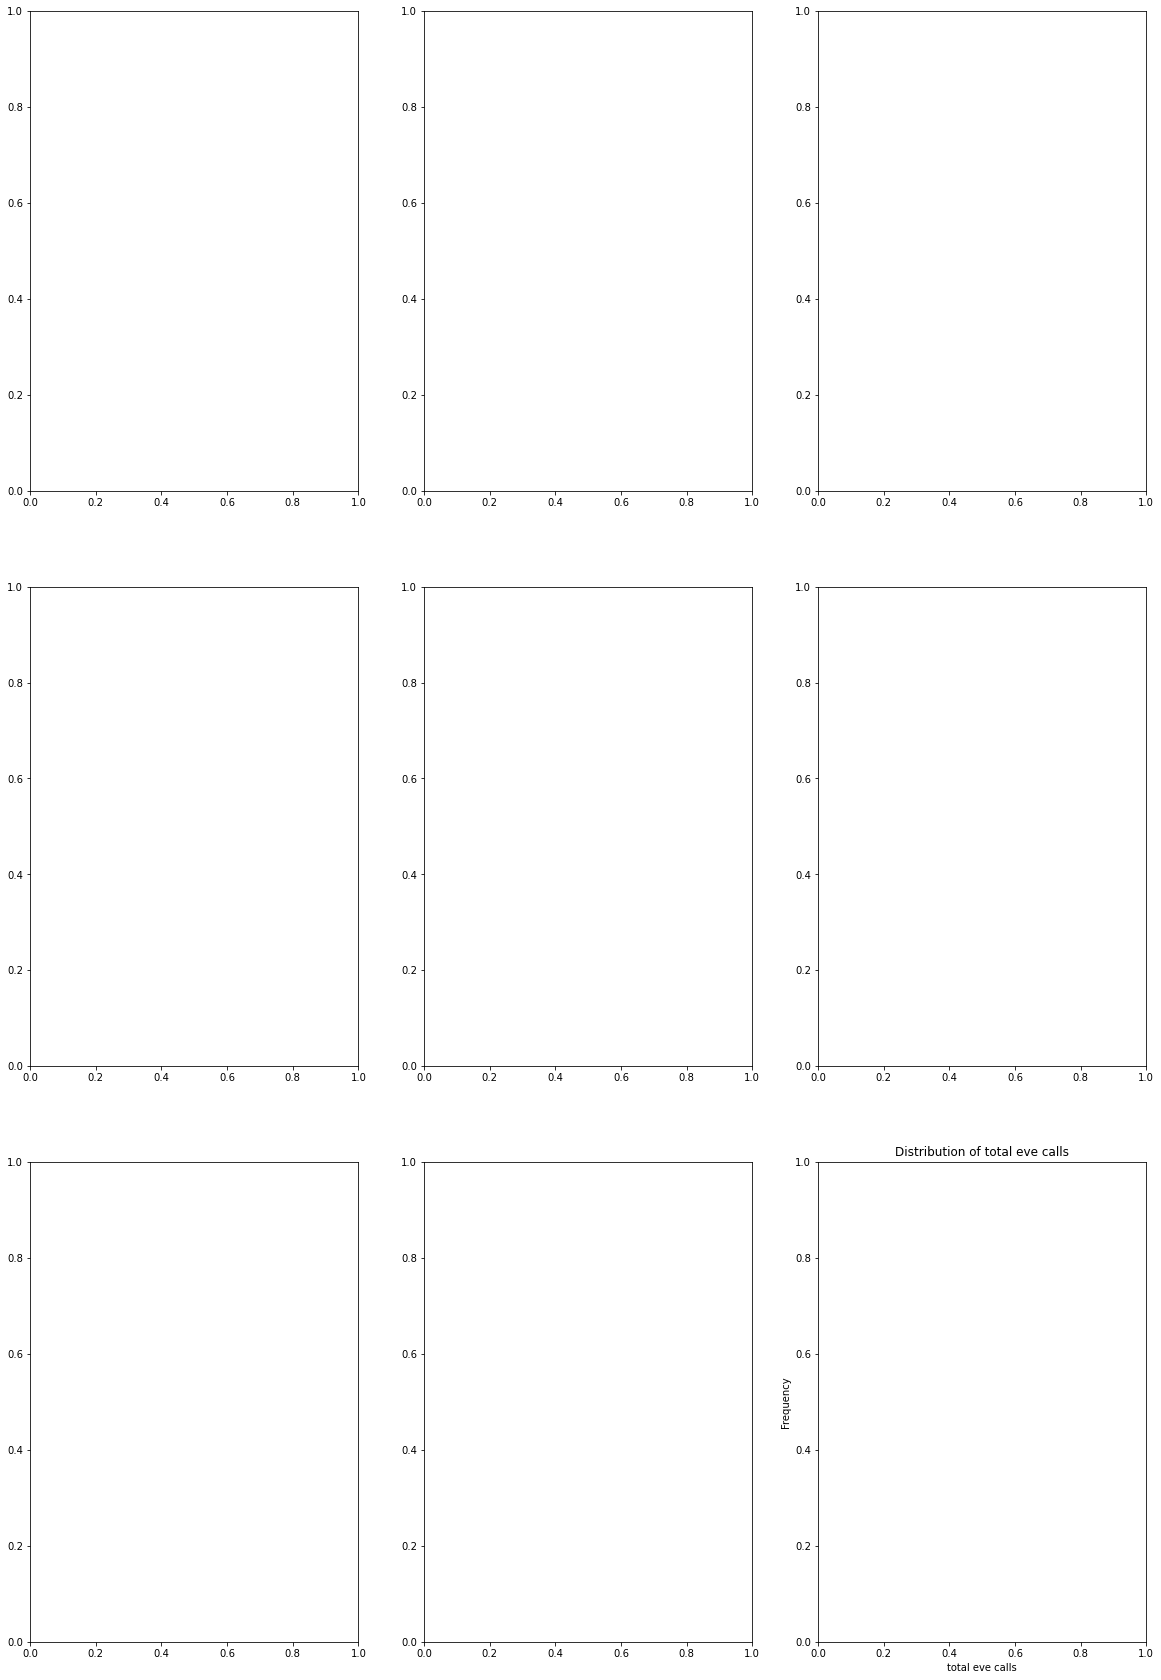

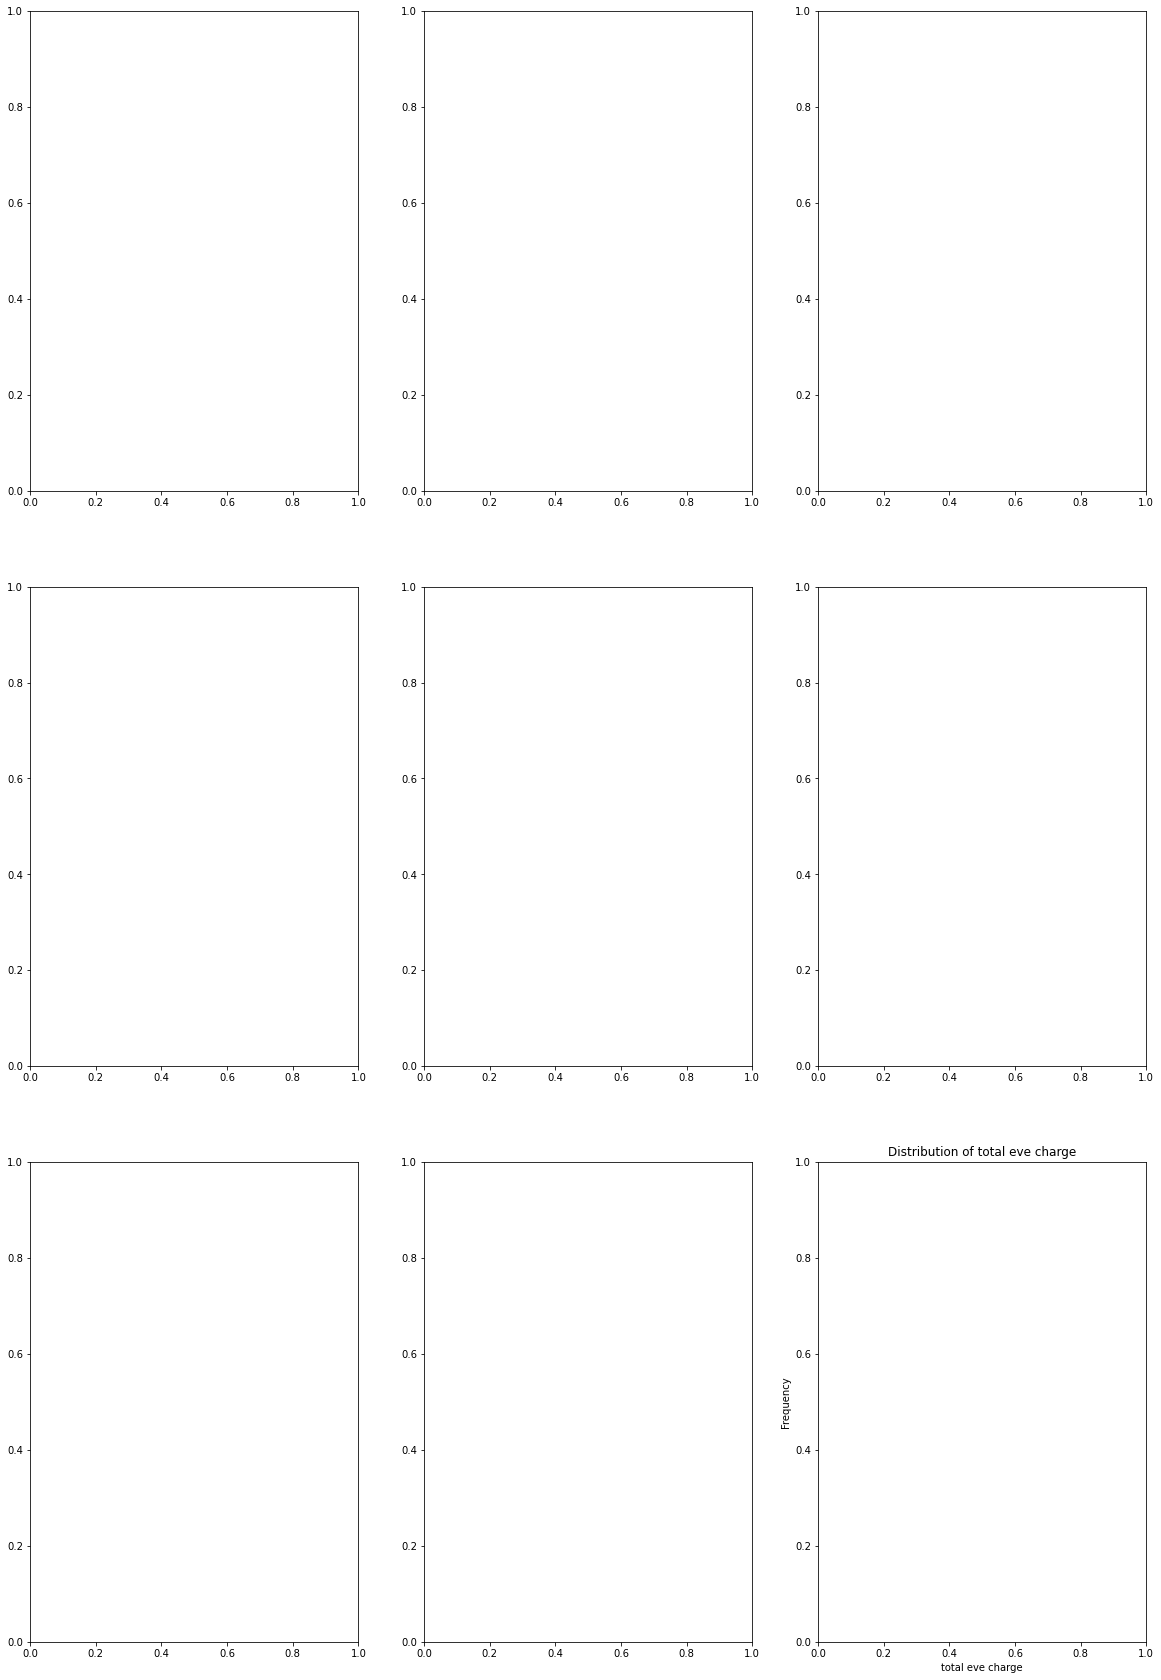

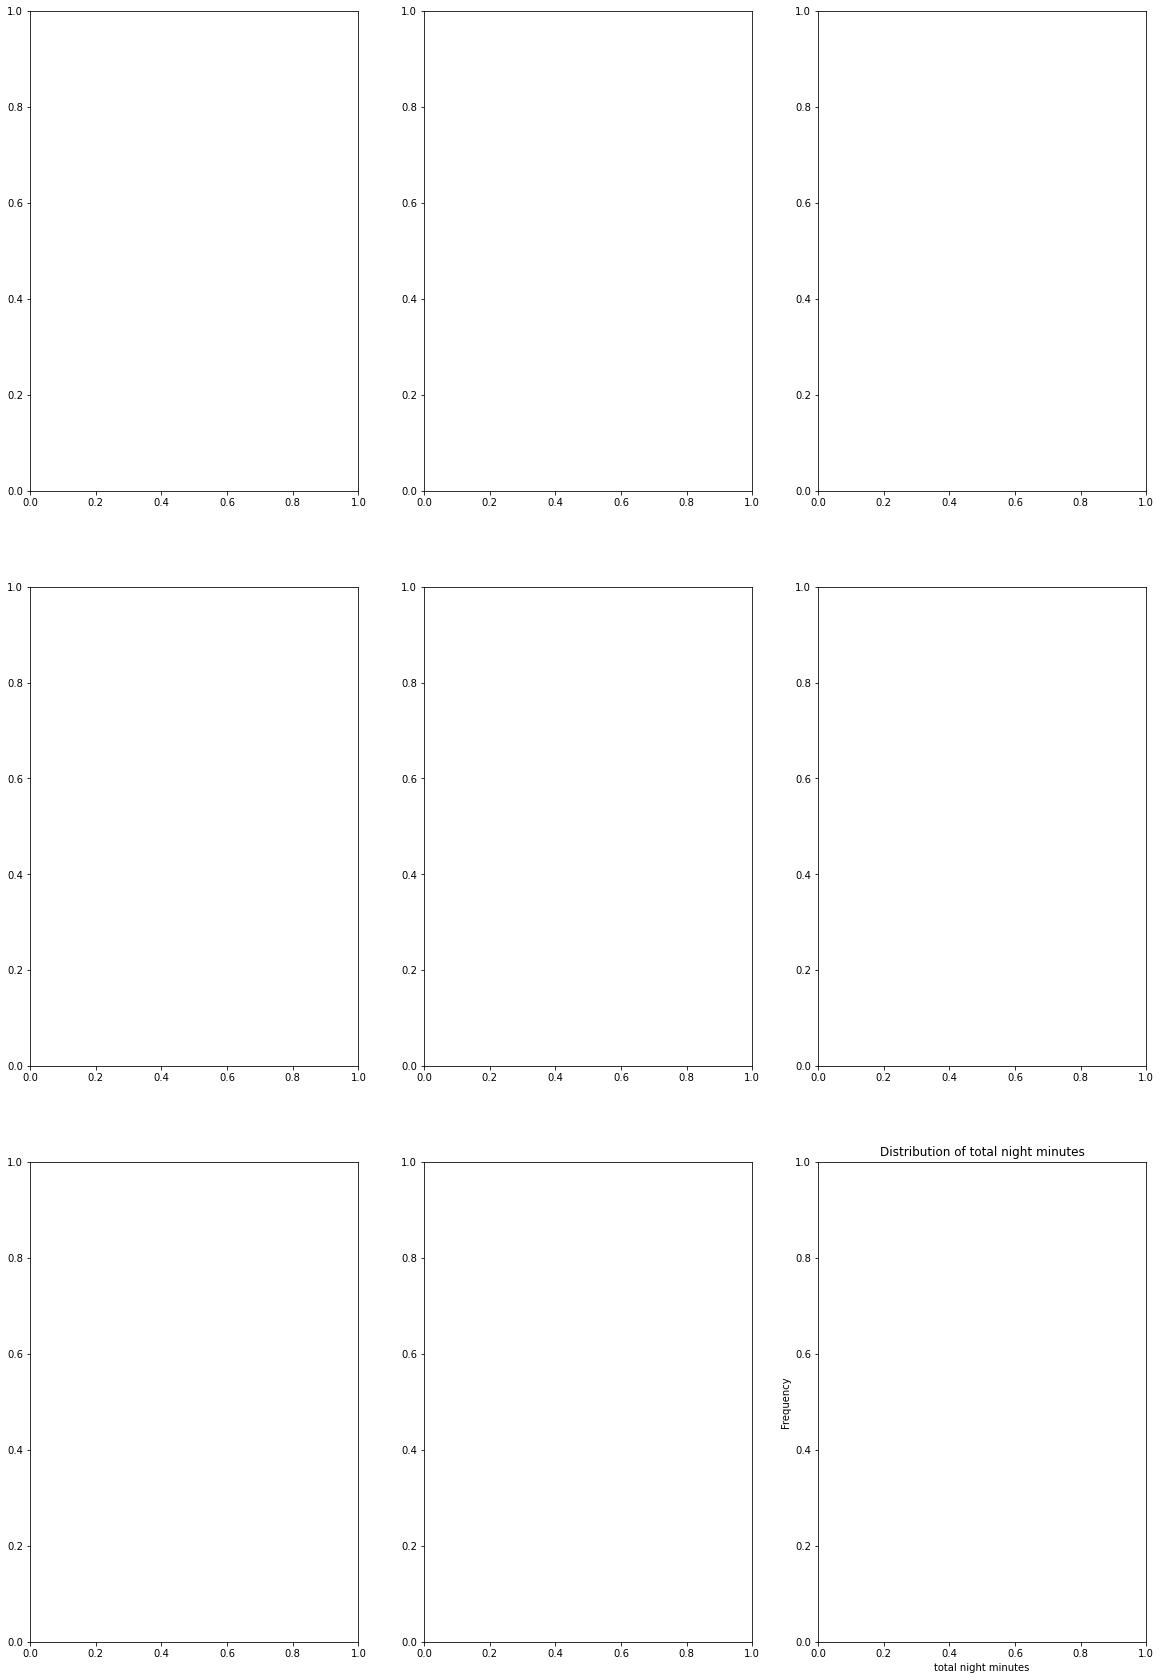

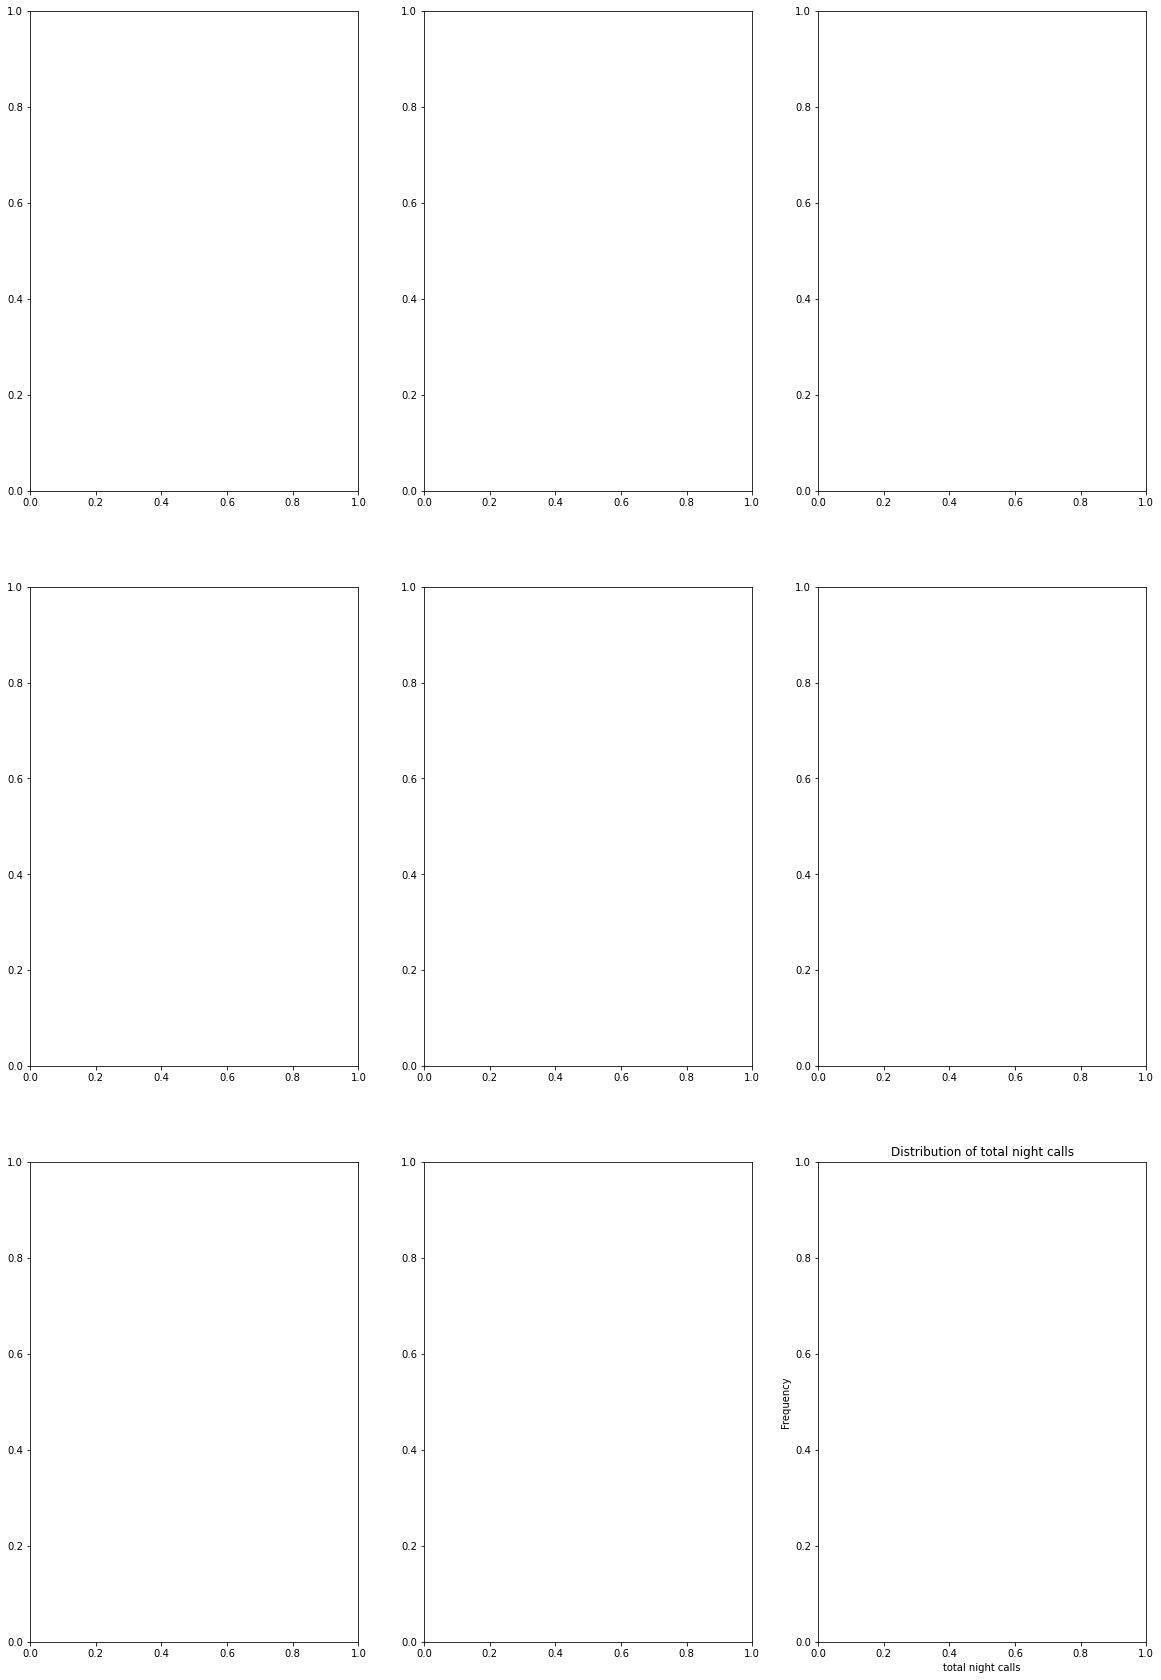

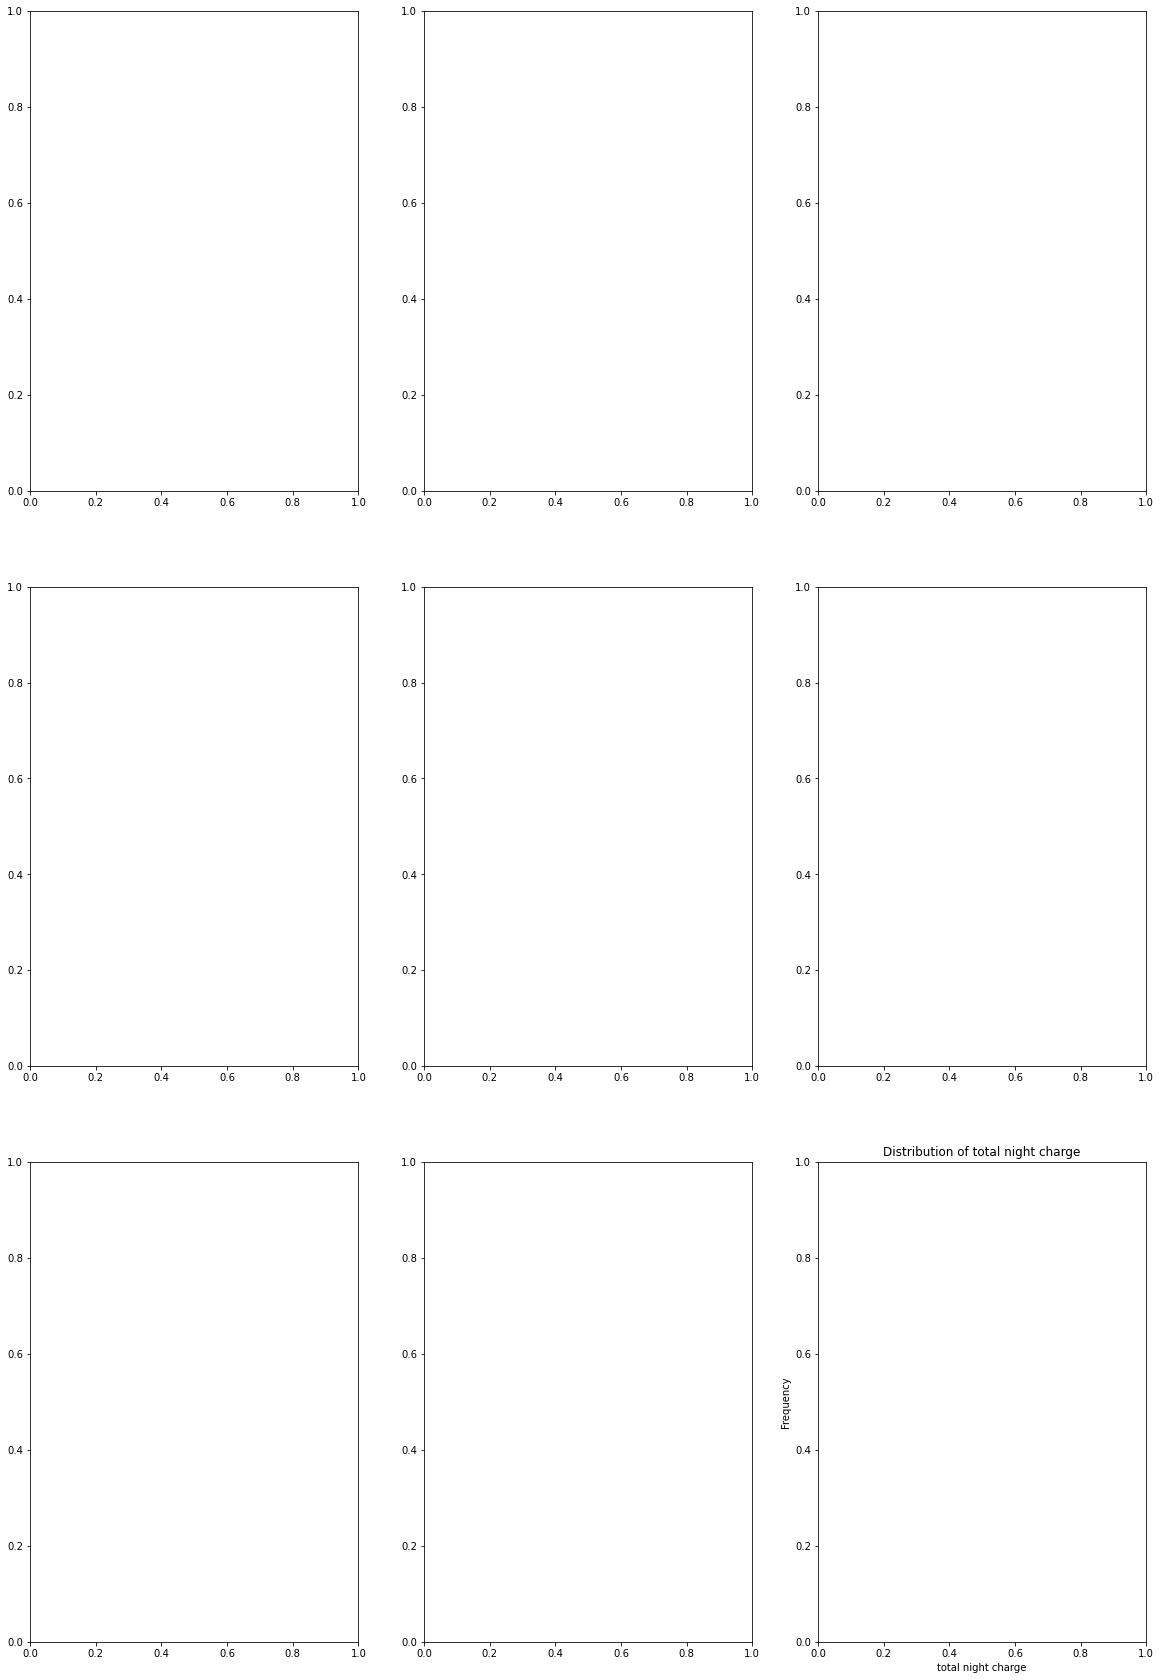

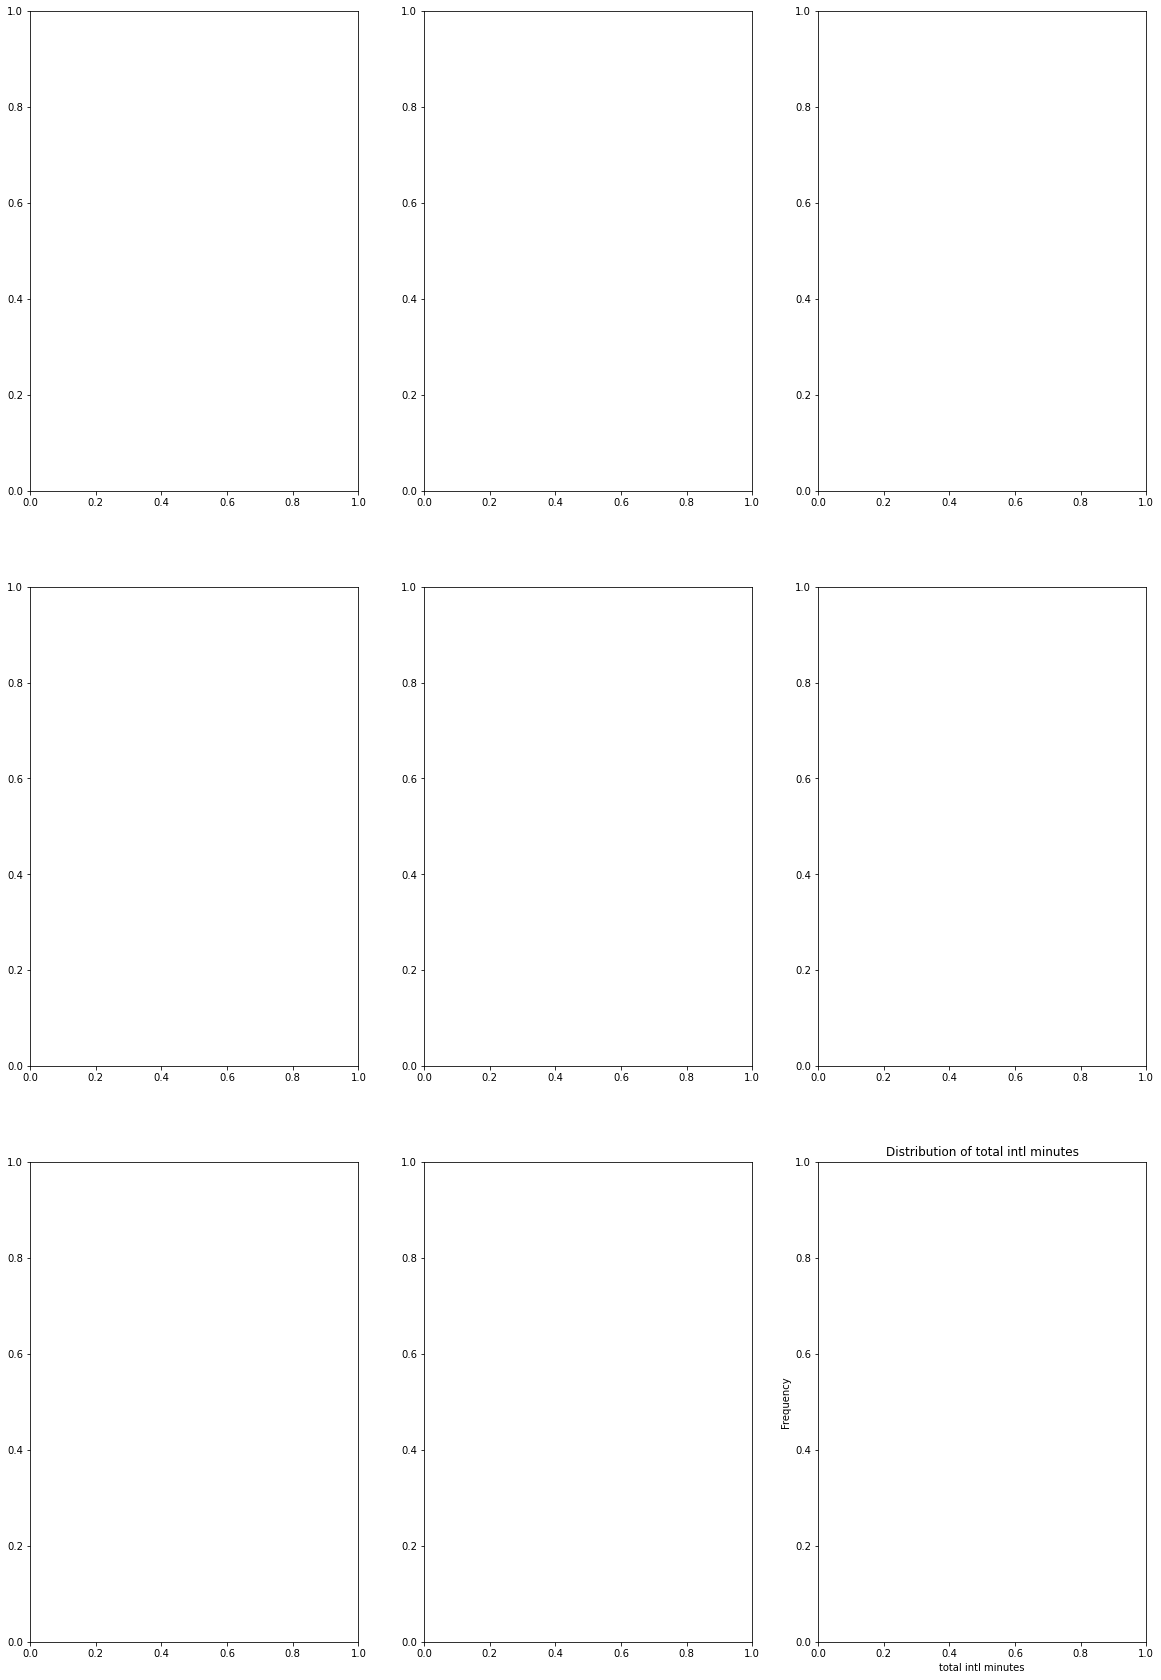

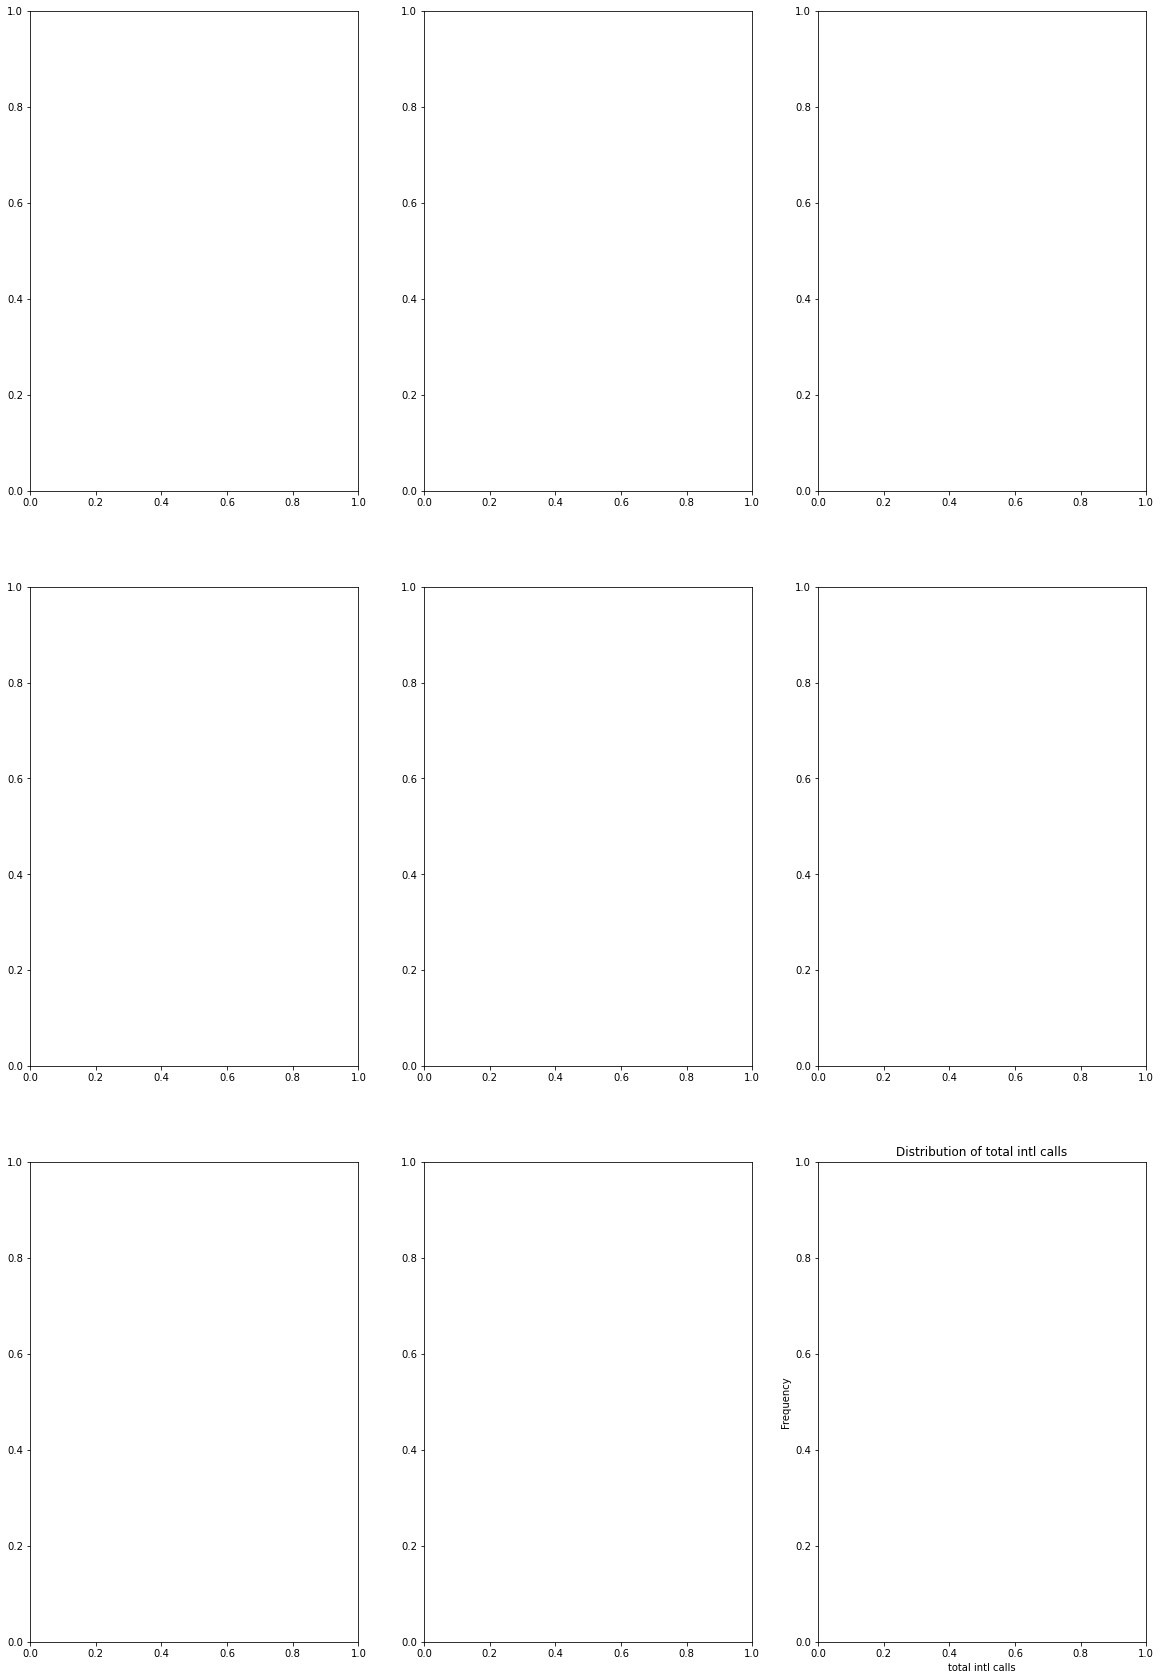

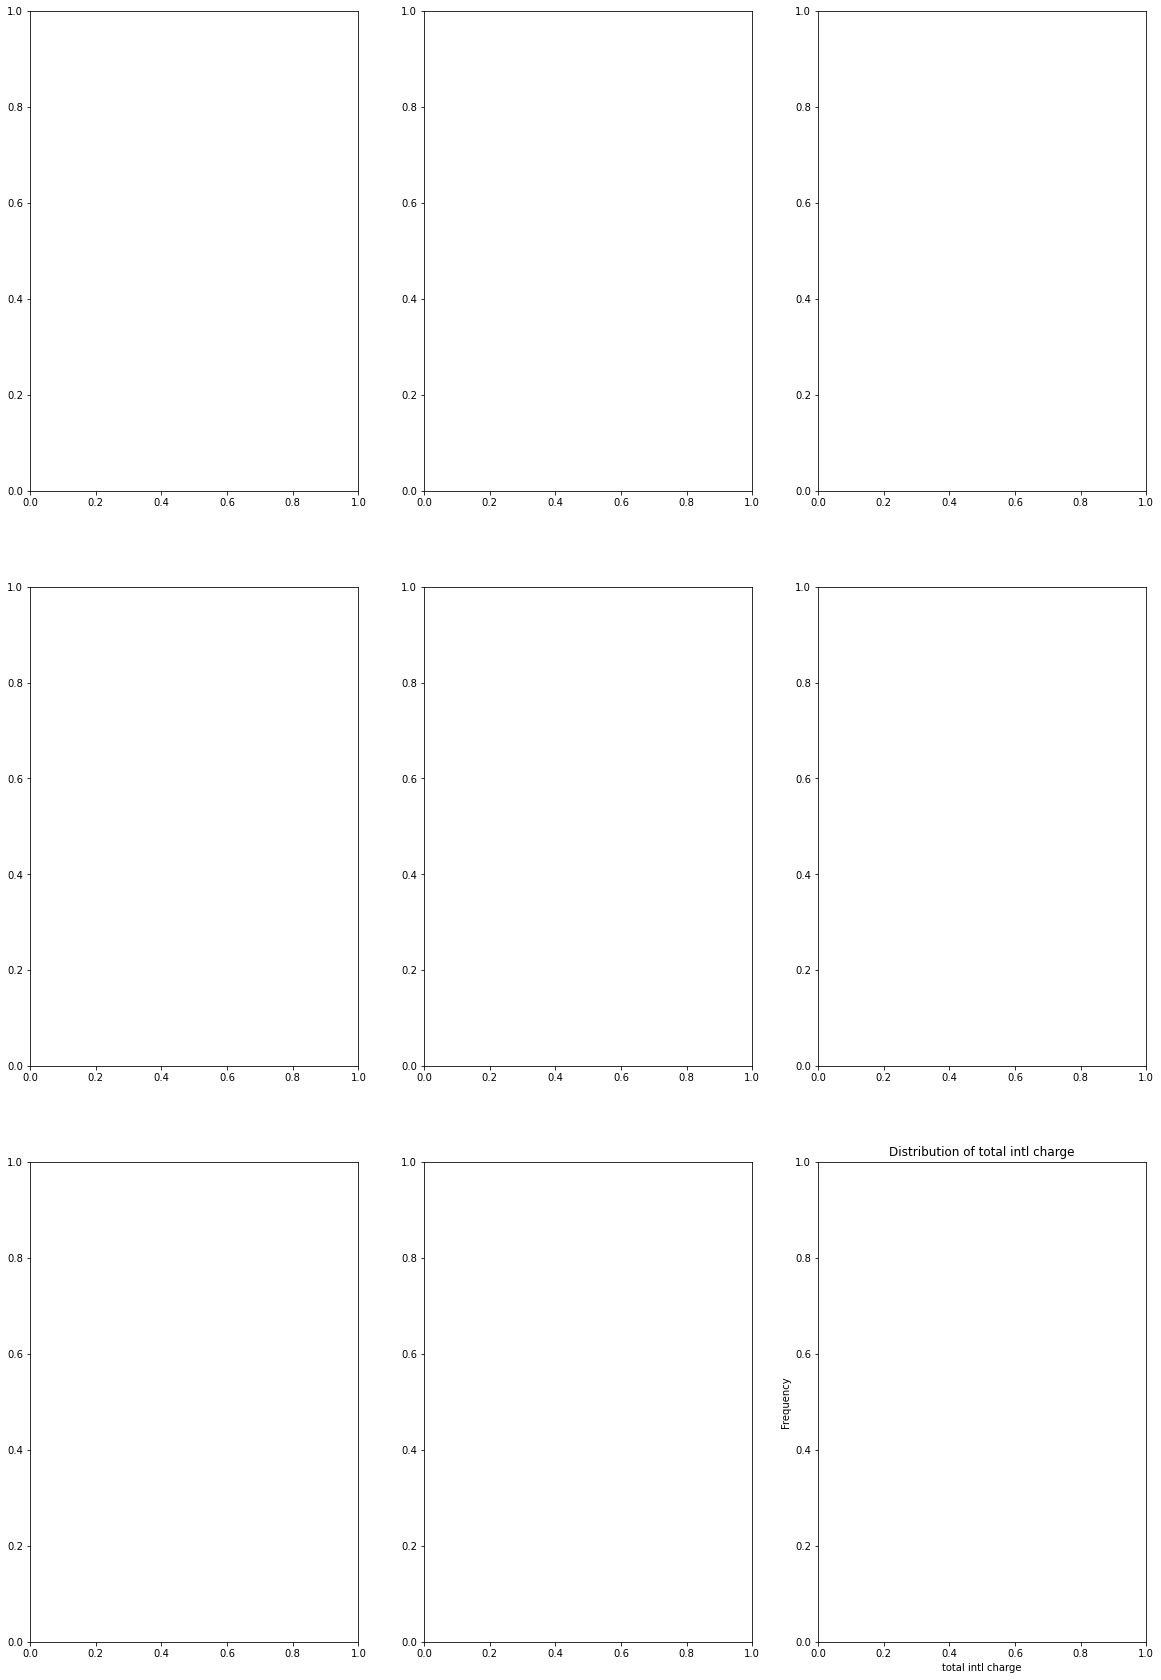

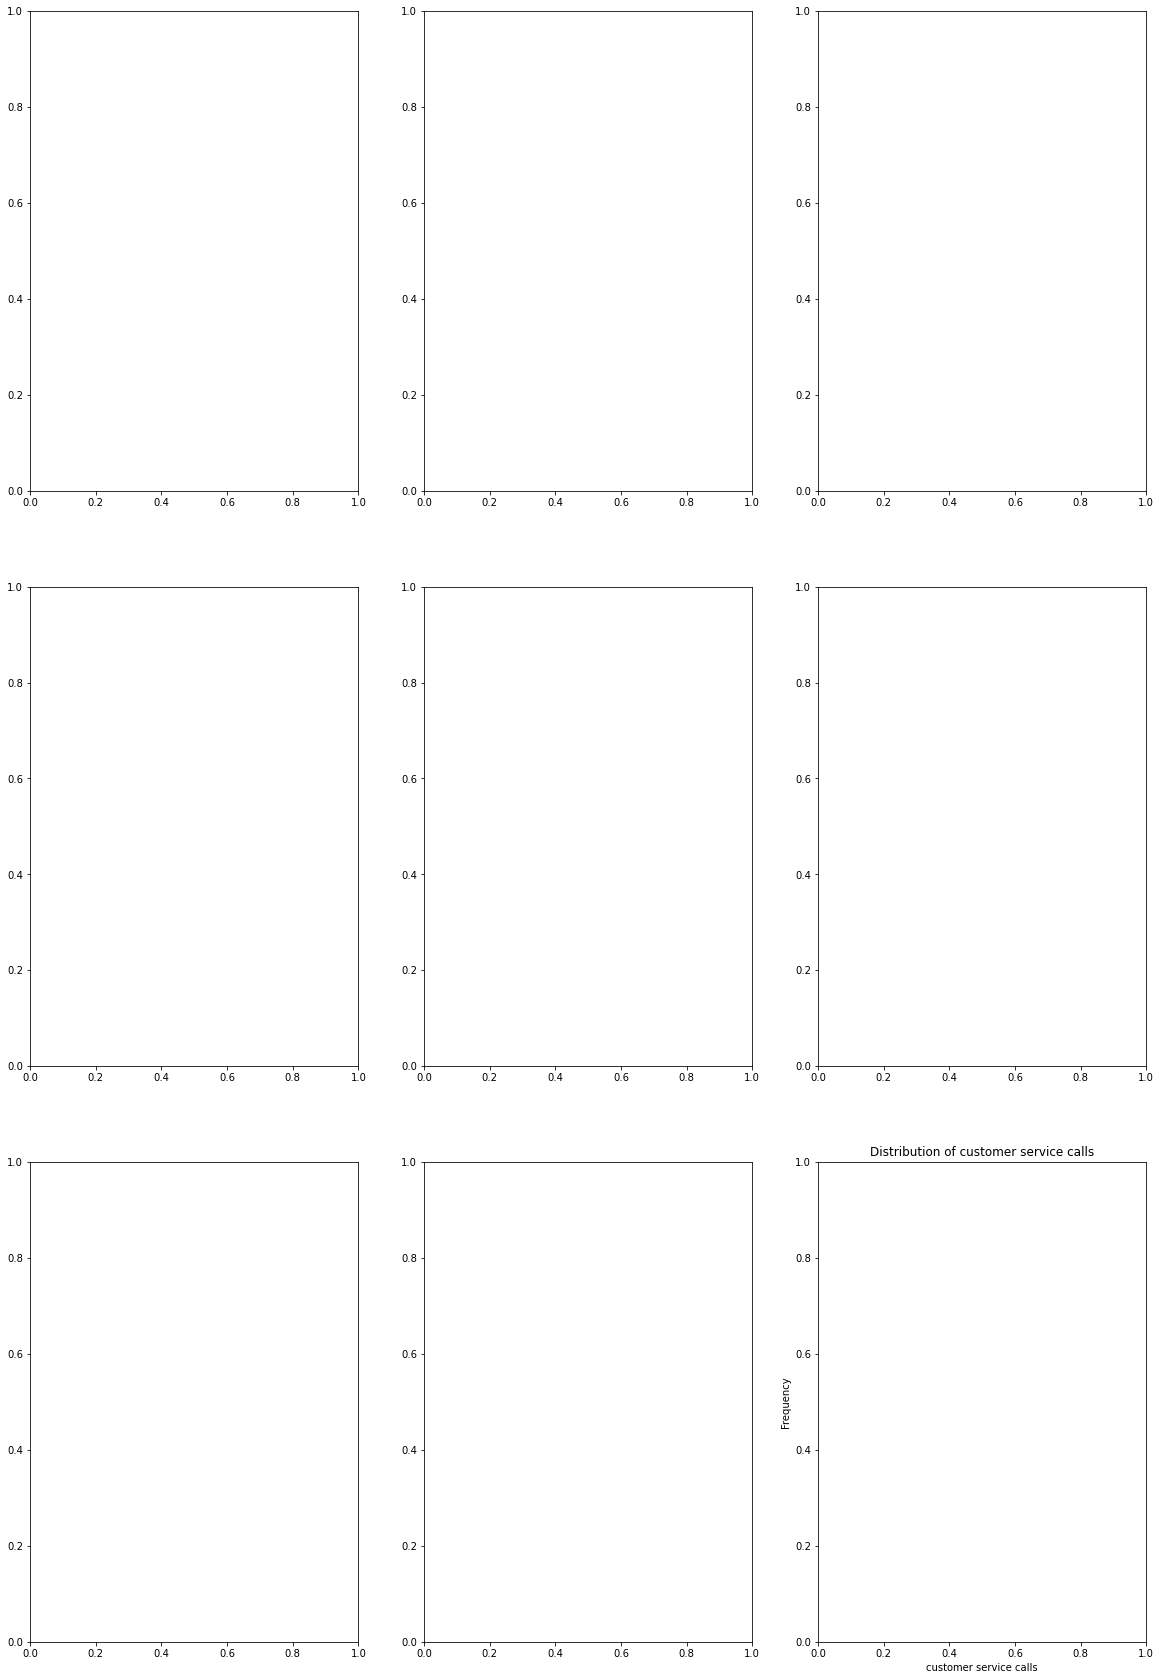

In [172]:
for col in num_vars:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 30))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [16]:
#data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
#plt.show()


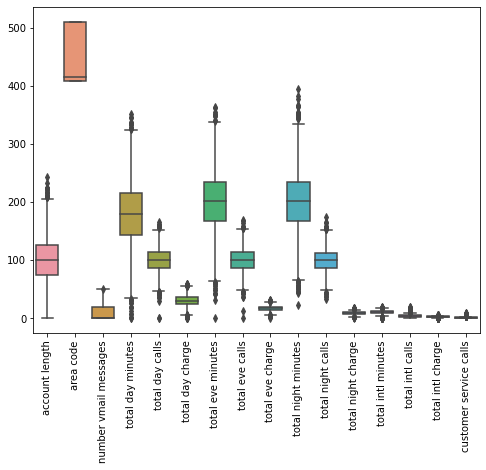

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=90)

plt.show()

<BarContainer object of 3333 artists>

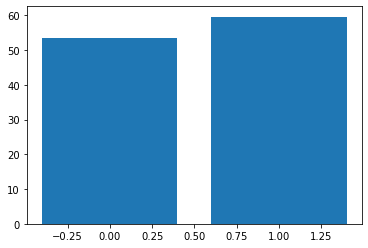

In [18]:
plt.bar(x = data["churn"], height=data["total day charge"])


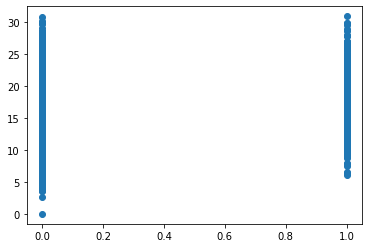

In [19]:
plt.scatter(x = data["churn"], y=data["total eve charge"])





<BarContainer object of 3333 artists>

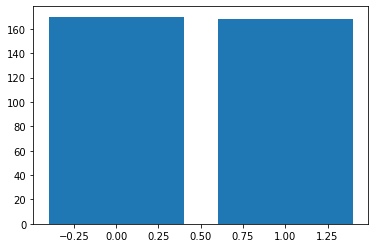

In [20]:
plt.bar(x = data["churn"], height=data["total eve calls"])

 

In [21]:
#Transform the voicemail column to binary values for easy coding
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})


Next we visualize the churned column in order to understand the pecrcentage of customers who are likely to churn and those likely to  remain

In [22]:
print("Churn Counts")
print(data["churn"].value_counts(normalize=True))
print()
print("Percentages")
print(data["churn"].value_counts(normalize=True))

Churn Counts
False    0.855086
True     0.144914
Name: churn, dtype: float64

Percentages
False    0.855086
True     0.144914
Name: churn, dtype: float64


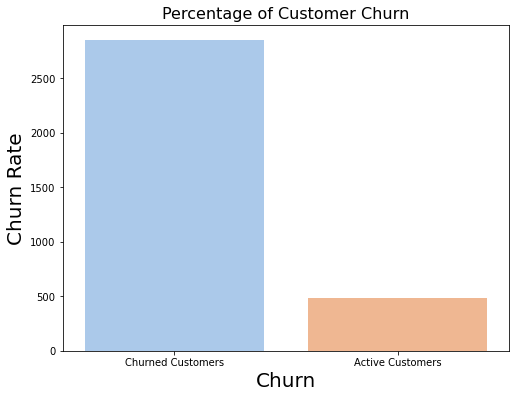

In [23]:
# Percentages of current customers vs customer churn
# churn_per = data["churn"].value_counts(normalize=True)

# Plot of percentages 
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data=data, x='churn',palette="pastel")
plt.title('Percentage of Customer Churn', fontsize = 16)
#ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['Churned Customers', 'Active Customers']);
#plt.tight_layout()   

from  the bar graph above we get to see that the customers who were going to churn were way fewer than those not  willing to churn


#### Churn rate for the average number of customer service calls

In [24]:
cust_serv_calls = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
cust_serv_calls

,churn
customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


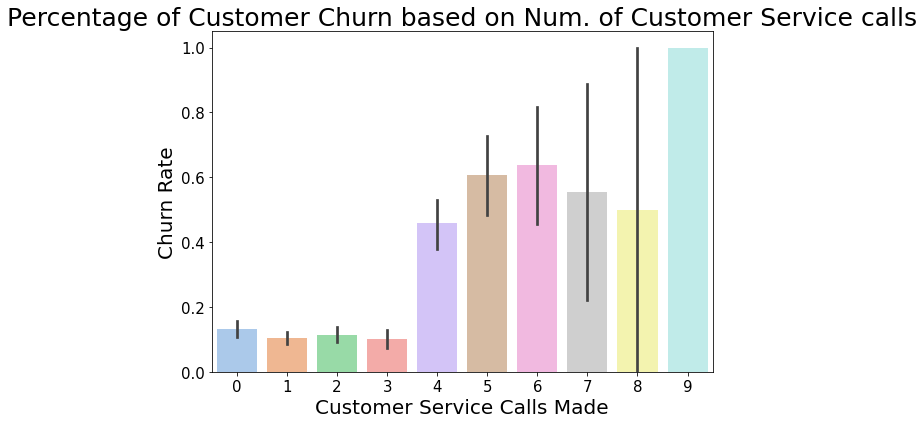

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['customer service calls'], y = 'churn',palette="pastel", ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
#plt.savefig('figures/cust_serv_call_churn.png')

The graph clearly shows a significant increase in the likelihood of customer churn when they make four or more calls to customer service.When the number of service calls reaches a maximum of nine, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers when they are calling customer service by the fourth time.

#### Churn rate for the average number of international calls

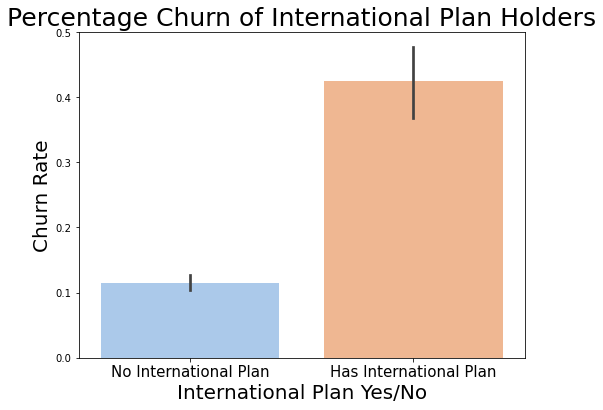

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="pastel", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

from the graph above many of the customers with international plan get to churn.This shows that the phone services are not satisfying them especially when they are out of the country.we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

In [27]:
data.corr().churn

account length            0.016541
area code                 0.006174
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

from the correlation matrix we get to see that customer service calls,total day minutes and internationa minutes have high correlation with churn.Most of the fetures do not have high correlation with the target column

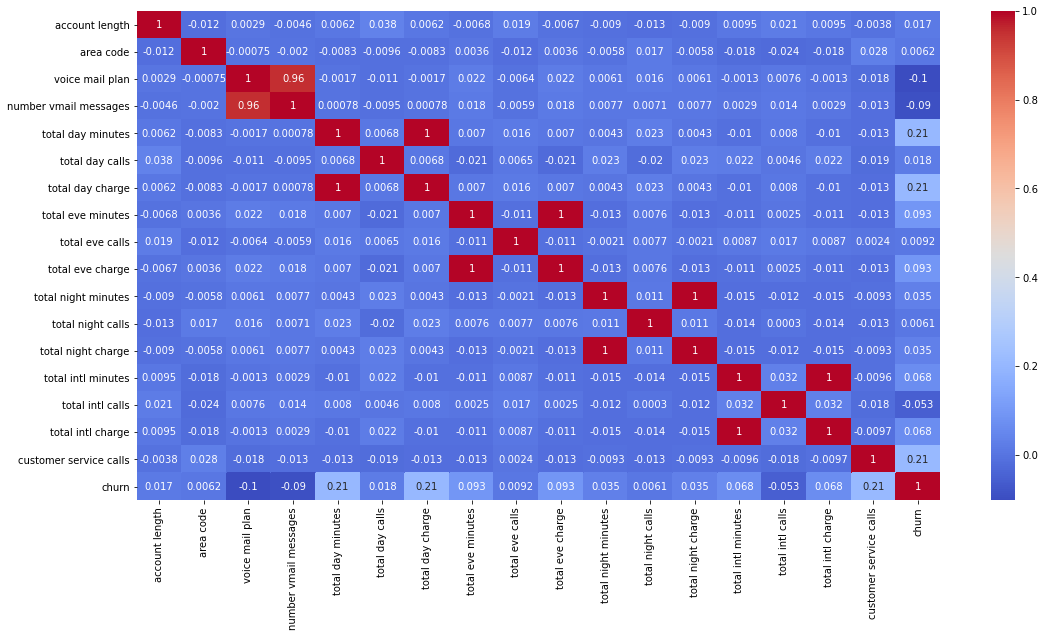

In [28]:
df = pd.DataFrame(data)
plt.figure(figsize=(18, 9))
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm')

# Show the plot
plt.show()

The heatmap above shows that the correlation  between the different features of the dataset.we get to see that most of the features are not highly correlated

### Feature engineering

In [29]:
data = pd.get_dummies(data, columns =["international plan"], drop_first = True)
data

,state,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes
0,KS,128,415,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,OK,75,415,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0
3329,WV,68,415,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0
3330,RI,28,510,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0
3331,CT,184,510,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1


In [30]:
data['churn'] = data['churn'].astype('int8')
data

,state,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes
0,KS,128,415,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,OK,75,415,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,WV,68,415,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,RI,28,510,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,CT,184,510,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1


## MODELLING

In [31]:
X=data.drop(data[['churn', 'state']], axis=1)
y=data['churn']

In [32]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3) 

##### Checking for data imbalance

In [33]:
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    1993
1     340
Name: churn, dtype: int64


0    857
1    143
Name: churn, dtype: int64


In [34]:
#Balancing the data

sm=SMOTE()
X_train_resample,y_train_resample=sm.fit_resample(X_train,y_train)


In [35]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resample)
X_test_scaled=scaler.transform(X_test)
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_df_train.head()

,account length,area code,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes
0,-0.551236,1.689393,-0.472705,-0.534752,0.205140,0.924864,0.205276,1.120100,-1.754410,1.120767,-0.513143,0.652321,-0.514551,-0.489158,0.401734,-0.495605,0.883775,-0.310743
1,-1.003861,1.689393,-0.472705,-0.534752,-0.934000,1.135744,-0.934334,-2.795727,-2.019889,-2.794593,-0.869461,1.139291,-0.868531,-0.220517,-0.926420,-0.225563,0.883775,-0.310743
2,0.407263,1.689393,2.115485,0.436070,0.510004,0.397663,0.509944,-1.093194,0.953472,-1.092055,-0.479607,-1.079129,-0.477290,-0.565913,0.844451,-0.566668,0.213035,-0.310743
3,-0.790861,-0.531696,-0.472705,-0.534752,1.459014,0.503103,1.458655,-0.298678,-1.754410,-0.298014,1.117537,-0.862697,1.115623,0.470274,1.287169,0.470860,-1.128445,-0.310743
4,0.513763,1.689393,2.115485,2.944028,-0.196427,0.872144,-0.196769,-0.604729,-1.595123,-0.605615,-0.850597,0.922859,-0.849901,0.393520,-0.040984,0.399796,-0.457705,-0.310743


In [91]:
def model_func(modelling):
    X=X_train_scaled
    X1= X_test_scaled
    y=y_train_resample 
    y1=y_test
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resample)
                             
    
    fitting = model.fit(X,y)
    y_predicting = model.predict(X1)
    scoring = model.score(X1, y1)
    model_cv = cross_val_score(model, X, y)
    model_report = classification_report(y1, y_predicting)
    model_roc_auc = roc_auc_score(y1, y_predicting)
    
    print("Score:")
    print("\t",scoring)
    print("\nCross validation:")
    print("\t",model_cv)
    print("\nClass report:")
    print(model_report)
    print("\nROC_AUC:")
    print("\t",model_roc_auc)

In [92]:
model= LogisticRegression(random_state=42)
model_func(model)

Score:
	 0.728

Cross validation:
	 [0.71052632 0.74153074 0.7327478  0.72521957 0.7327478 ]

Class report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       857
           1       0.31      0.74      0.44       143

    accuracy                           0.73      1000
   macro avg       0.63      0.73      0.63      1000
weighted avg       0.85      0.73      0.77      1000


ROC_AUC:
	 0.73352318626531


In [115]:
def score(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test
    
    fitting = model.fit(X,y)
    scoring = model.score(X1, y1)
    model_cv = cross_val_score(model, X, y)
    
    return scoring, model_cv

In [116]:
model = LogisticRegression(random_state=42)
score_result, cv_result = score(model)

print("Score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Score:
	 0.728

Cross Validation:
	 [0.71052632 0.74153074 0.7327478  0.72521957 0.7327478 ]


In [132]:
def report(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test

    fitting = model.fit(X, y)  # Fit the model with training data
    y_predicting = model.predict(X1)
    model_report = classification_report(y1, y_predicting)
    model_roc_auc = roc_auc_score(y1, y_predicting)

    return model_report, model_roc_auc

In [133]:
model = LogisticRegression(random_state=42)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       857
           1       0.31      0.74      0.44       143

    accuracy                           0.73      1000
   macro avg       0.63      0.73      0.63      1000
weighted avg       0.85      0.73      0.77      1000


ROC AUC Score:
0.73352318626531


In [112]:
base_model = LogisticRegression(random_state=42)

base_model.fit(X_train_scaled, y_train_resample)
y_pred = base_model.predict(X_test_scaled)

In [37]:
# calculating the score
base_score=base_model.score(X_test_scaled,y_test)
base_score

0.728

In [84]:
#cross validation
base_model_cv=cross_val_score(base_model,X_train_scaled,y_train_resample)
base_model_cv

array([0.71052632, 0.74153074, 0.7327478 , 0.72521957, 0.7327478 ])

In [39]:
base_class=classification_report(y_test,y_pred)
print(base_class)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       857
           1       0.31      0.74      0.44       143

    accuracy                           0.73      1000
   macro avg       0.63      0.73      0.63      1000
weighted avg       0.85      0.73      0.77      1000



####  Decision trees

In [143]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
score_result, cv_result = score(model)

print("Tree_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Tree_score:
	 0.931

Cross Validation:
	 [0.79197995 0.77666248 0.79924718 0.78795483 0.79046424]


In [144]:
model = DecisionTreeClassifier(random_state=42)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       857
           1       0.50      0.77      0.61       143

    accuracy                           0.86      1000
   macro avg       0.73      0.82      0.76      1000
weighted avg       0.89      0.86      0.87      1000


ROC AUC Score:
0.8210214522933309


In [150]:
def conf_matrix(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test
    
    
    y_predicting = model.predict(X1)
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X, y)
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y1, y_predicting)
    
    return dis_estimator, dis_predictor

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b2cf6c1f0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b2988e9a0>)

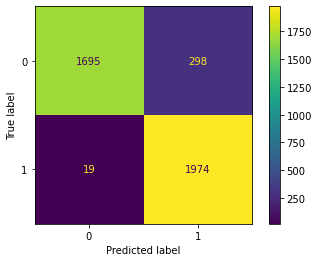

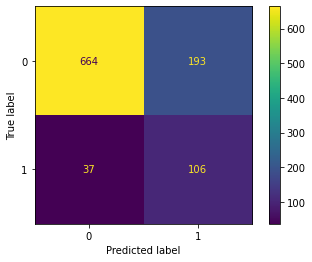

In [151]:
conf_matrix(model)

In [ ]:
model = DecisionTreeClassifier(random_state=42)


In [135]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

tree.fit(X_train_scaled, y_train_resample)
y_tree_pred = tree.predict(X_test_scaled)
#y_pred_train=tree.predict(X_train_scaled)

# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train_resample)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  0.814350225790266
Test data score:  0.931


In [136]:
tree_cv = cross_val_score(tree, X_train_scaled, y_train_resample)
tree_cv

array([0.79197995, 0.77666248, 0.79924718, 0.78795483, 0.79046424])

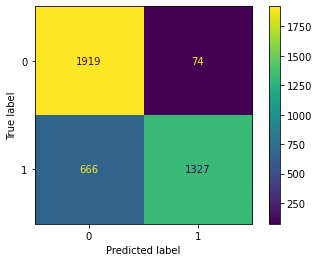

In [42]:
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train_resample);

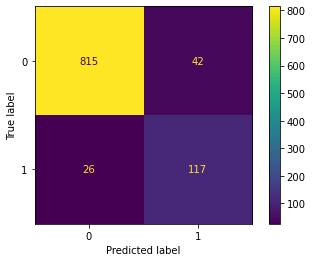

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

In [44]:
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       857
           1       0.74      0.82      0.77       143

    accuracy                           0.93      1000
   macro avg       0.85      0.88      0.87      1000
weighted avg       0.94      0.93      0.93      1000



###  KNN MODELLING 

In [156]:
knn_pred_proba=knn.predict_proba(X_test_scaled)
print(knn_pred_proba)

[[0.2 0.8]
 [0.4 0.6]
 [0.4 0.6]
 ...
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]]


In [164]:
model = KNeighborsClassifier(n_neighbors=5)
score_result, cv_result = score(model)
report_result, roc_auc_result = report(model)

print("knn_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)


knn_score:
	 0.77

Cross Validation:
	 [0.85463659 0.86700125 0.86825596 0.86072773 0.85947302]


In [154]:
model = KNeighborsClassifier(n_neighbors=5)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       857
           1       0.35      0.74      0.48       143

    accuracy                           0.77      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.86      0.77      0.80      1000


ROC AUC Score:
0.7580272702793123


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b2e3009a0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b299f8910>)

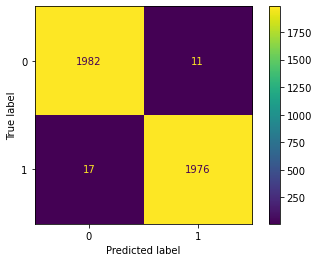

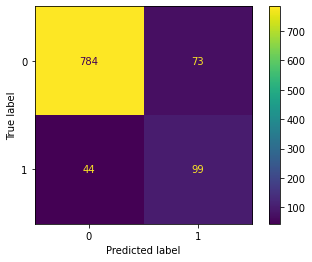

In [158]:
conf_matrix(model)

In [155]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train_resample)
knn_y_pred=knn.predict(X_test_scaled)
#knn_pred_train=knn.predict(X_train_scaled)
knn_pred_proba=knn.predict_proba(X_test_scaled)
print(knn_pred_proba)

[[0.2 0.8]
 [0.4 0.6]
 [0.4 0.6]
 ...
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]]


In [46]:
knn_score=knn.score(X_train_scaled,y_train_resample)
knn_score

0.920471650777722

In [47]:
knn_cv=cross_val_score(knn,X_train_scaled,y_train_resample)
knn_cv

array([0.85463659, 0.86700125, 0.86825596, 0.86072773, 0.85947302])

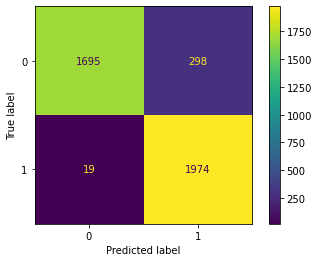

In [48]:
ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train_resample);

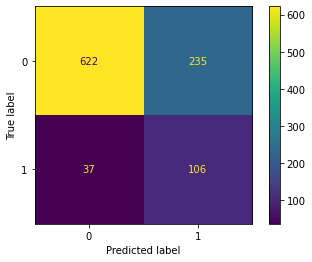

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [50]:
knn_score=classification_report(y_test,knn_y_pred)
print(knn_score)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       857
           1       0.35      0.74      0.48       143

    accuracy                           0.77      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.86      0.77      0.80      1000



#### Random forest classifier

In [51]:
rf = RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(X_train_scaled,y_train_resample)


RandomForestClassifier(n_estimators=5, random_state=42)

In [165]:
model = RandomForestClassifier(n_estimators=5,random_state=42)
score_result, cv_result = score(model)

print("rf_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

rf_score:
	 0.883

Cross Validation:
	 [0.88345865 0.89962359 0.91468005 0.90464241 0.9033877 ]


In [159]:
model = RandomForestClassifier(n_estimators=5,random_state=42)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       857
           1       0.58      0.69      0.63       143

    accuracy                           0.88      1000
   macro avg       0.76      0.80      0.78      1000
weighted avg       0.89      0.88      0.89      1000


ROC AUC Score:
0.803563414415223


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b24d3c2e0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x16b2cb7b5e0>)

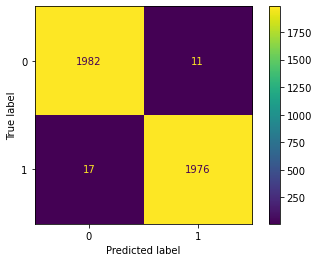

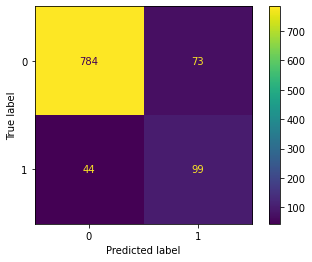

In [161]:
conf_matrix(model)

In [52]:
X_pred_train=rf.predict(X_train_scaled)
y_rf_pred=rf.predict(X_test_scaled)


In [53]:
rf_score = rf.score(X_train_scaled, y_train_resample)

rf_score


0.9929754139488208

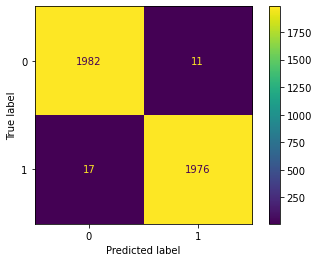

In [54]:
#build a confusion matrix and classification report
ConfusionMatrixDisplay.from_estimator( rf,X_train_scaled, y_train_resample);


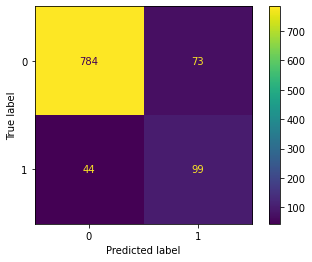

In [55]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf_pred))

In [56]:
rf_report=classification_report(y_test,y_rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       857
           1       0.58      0.69      0.63       143

    accuracy                           0.88      1000
   macro avg       0.76      0.80      0.78      1000
weighted avg       0.89      0.88      0.89      1000



In [162]:
# Define the hyperparameter grids for the decision tree and random forest models
#dt_param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV objects for the decision tree and random forest models
#dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Fit the GridSearchCV objects to the training data
#dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best scores for the models
#dt_best_params = dt_grid_search.best_params_
#dt_best_score = dt_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Train the decision tree and random forest models with the best hyperparameters on the entire training dataset
#dt_clf = DecisionTreeClassifier(**dt_best_params)
rf_clf = RandomForestClassifier(**rf_best_params)
#dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the performance of the models using accuracy
#dt_y_pred = dt_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
#dt_recall = recall_score(y_test, dt_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

# Compare the performance of the decision tree and random forest models based on recall and select the best one
#if dt_recall > rf_recall:
   # print('Decision tree is better, with recall:', dt_recall)
#else:
print('Random forest has a recall of:', rf_recall)

Random forest has a recall of: 0.6713286713286714
